In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from datetime import datetime

import pprint
import numpy as np

from matplotlib.lines import Line2D

%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

## Scraped Tweets between 03/09/2020 and 03/22/2020

In [4]:
tracker = pickle.load(open(f'tweets/tweets_tracker.txt', 'rb'))
tracker

{'california': {'max_id': 1241540334410137603,
  'downloaded': 429513,
  'tweetLocation': '36.116,-119.682,300mi'},
 'colorado': {'max_id': 1241537123749990400,
  'downloaded': 41088,
  'tweetLocation': '39.060,-105.311,200mi'},
 'florida': {'max_id': 1241548946062880768,
  'downloaded': 148567,
  'tweetLocation': '27.766,-81.687,225mi'},
 'georgia': {'max_id': 1241551890954977281,
  'downloaded': 137930,
  'tweetLocation': '32.781,-83.334,150mi'},
 'idaho': {'max_id': 1241513089557618688,
  'downloaded': 9493,
  'tweetLocation': '44.241,-114.479,200mi'},
 'illinois': {'max_id': 1241557440681910273,
  'downloaded': 190732,
  'tweetLocation': '40.350,-88.986,150mi'},
 'louisiana': {'max_id': 1241554798308216832,
  'downloaded': 73430,
  'tweetLocation': '31.170,-91.868,150mi'},
 'massachusetts': {'max_id': 1241559391960289280,
  'downloaded': 136352,
  'tweetLocation': '42.230,-71.530,100mi'},
 'newyork': {'max_id': 1241567743842947074,
  'downloaded': 430184,
  'tweetLocation': '40.700

# Visualizing California Average Sentiment against Confirmed Coronavirus Cases
Testing color schemes that work with powerpoint so nothing may appear

In [19]:
df = pd.read_csv(f'tweets/tweets_processed/coronavirus_california_tweets_processed', engine = 'python')

In [29]:
df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d'))

In [37]:
dates = df.groupby(['date'])['sentiment'].mean().keys().tolist()
average_sentiment = df.groupby(['date'])['sentiment'].mean().tolist()

In [44]:
cases_df = pd.read_csv(f'tweets/time_series_19-covid-Confirmed.txt', engine = 'python')

In [77]:
state_cases = cases_df[cases_df['Province/State'] == 'California']
state_cases = state_cases.iloc[:,-len(dates):].transpose()
state_cases.columns = ['california']

In [81]:
state_cases = state_cases['california'].tolist()

* positive sentiment: compound score >= 0.05
* neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
* negative sentiment: compound score <= -0.05

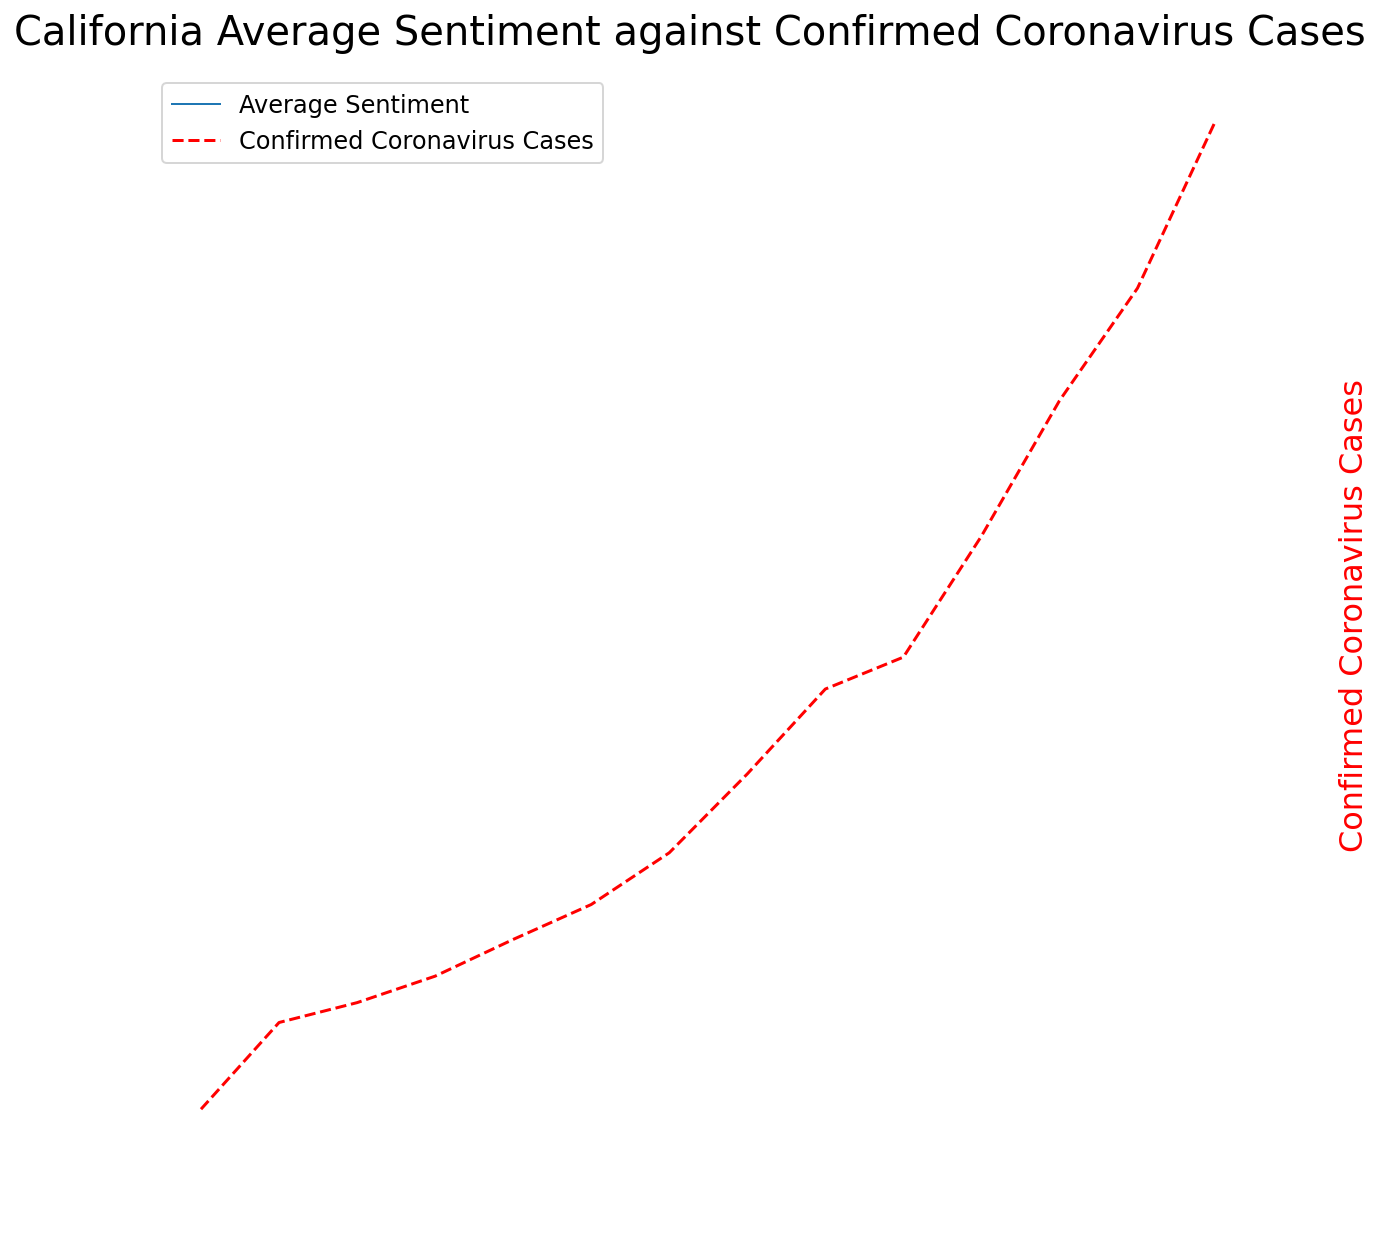

In [220]:
with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(10,10))
    fig.suptitle(f'California Average Sentiment against Confirmed Coronavirus Cases', fontsize=20, y=0.92)
    ax1 = fig.add_subplot(111)
    ax1.plot(dates, average_sentiment, color='w')
    ax1.set_ylabel('Average Sentiment Over Time', fontsize=16, color='w')
    ax1.set_xlabel('Date', fontsize=16, color='w')

    ax2 = ax1.twinx()
    ax2.plot(dates, state_cases, 'r-', linestyle='dashed')
    ax2.set_ylabel('Confirmed Coronavirus Cases', color='r', fontsize=16)
    for t1 in ax2.get_yticklabels():
        t1.set_color('w')

#     from matplotlib.lines import Line2D

#     ax1_line = Line2D([0], [0], lw=1, label='Average Sentiment')
#     ax2_line = Line2D([0], [0], color='r', lw=1.5, ls='--', label='Confirmed Coronavirus Cases')
#     plt.legend(handles=[ax1_line, ax2_line], fontsize=12, fancybox=True)

    plt.savefig('tweets/images/california_sentiment_vs_cases.png')

# Batch Run of Average Sentiment against Confirmed Coronavirus Cases

In [68]:
cases_df = pd.read_csv(f'tweets/time_series_19-covid-Confirmed.txt', engine = 'python')
cases_df['Province/State'] = cases_df['Province/State'].apply(lambda x:  x.replace(' ','') if type(x) == str else False)
cases_df['Province/State'] = cases_df['Province/State'].apply(lambda x:  x.lower() if type(x) == str else False)

def graphSentimentVsCases(state):
    df = pd.read_csv(f'tweets/tweets_processed/coronavirus_{state}_tweets_processed', engine = 'python')
    df = df[df['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
    df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d') if type(x) == str else '0.0')
    df = df[df['date'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
    dates = df.groupby(['date'])['sentiment'].mean().keys().tolist()
    average_sentiment = df.groupby(['date'])['sentiment'].mean().tolist()

    state_cases = cases_df[cases_df['Province/State'] == state]
    state_cases = state_cases.iloc[:,-len(dates):].transpose()
    state_cases.columns = [state]
    state_cases = state_cases[state].tolist()
    
    with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
        fig = plt.figure(figsize=(10,10))
        fig.suptitle(f'{state.capitalize()} Average Sentiment against Confirmed Coronavirus Cases', fontsize=20, y=0.92, color='w')
        ax1 = fig.add_subplot(111)
        ax1.plot(dates, average_sentiment, color='w')
        ax1.set_ylabel('Average Sentiment Over Time', fontsize=16, color='w')
        ax1.set_xlabel('Date', fontsize=16, color='w')

        ax2 = ax1.twinx()
        ax2.plot(dates, state_cases, 'r-', linestyle='dashed')
        ax2.set_ylabel('Confirmed Coronavirus Cases', color='r', fontsize=16)
        for t1 in ax2.get_yticklabels():
            t1.set_color('r')

#         ax1_line = Line2D([0], [0], lw=1, label='Average Sentiment')
#         ax2_line = Line2D([0], [0], color='r', lw=1.5, ls='--', label='Confirmed Coronavirus Cases')
#         plt.legend(handles=[ax1_line, ax2_line], fontsize=12, fancybox=True)
    
        plt.savefig(f'tweets/images/{state}_sentiment_vs_cases.png', transparent=True, bbox_inches='tight')
    print(f'Saved graph for {state}!')

Saved graph for california!
Saved graph for colorado!
Saved graph for florida!
Saved graph for georgia!
Saved graph for idaho!
Saved graph for illinois!
Saved graph for louisiana!
Saved graph for massachusetts!
Saved graph for newyork!
Saved graph for tennessee!
Saved graph for texas!
Saved graph for washington!


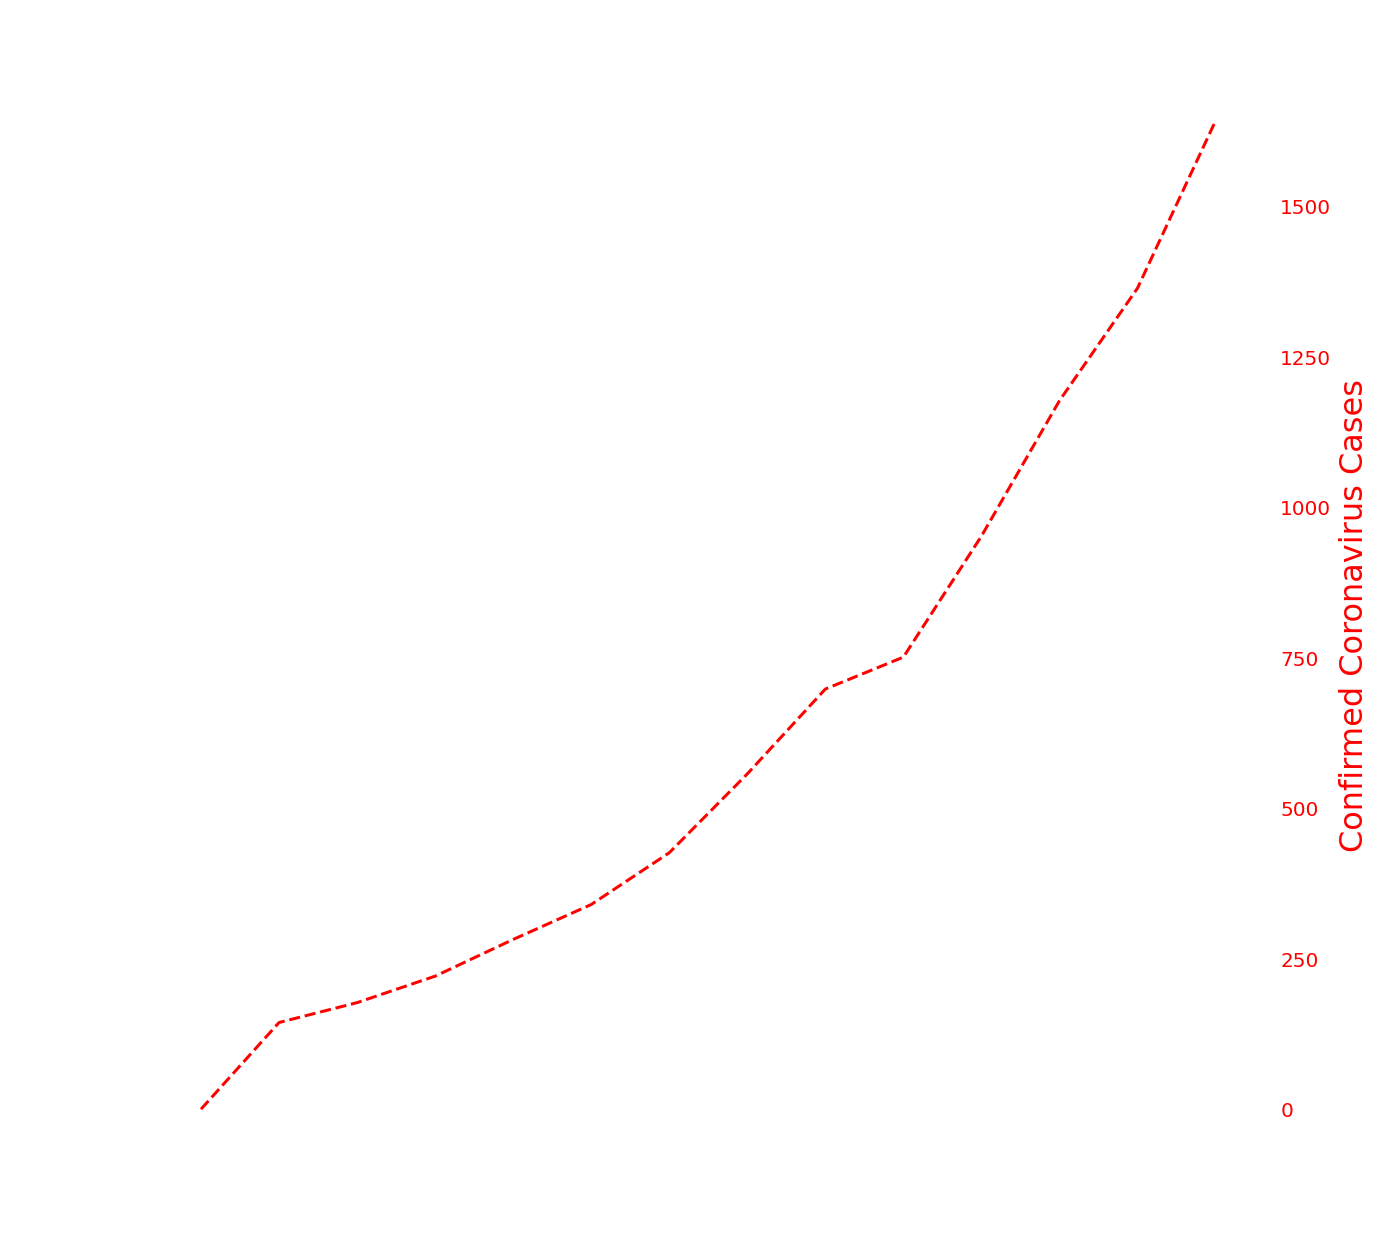

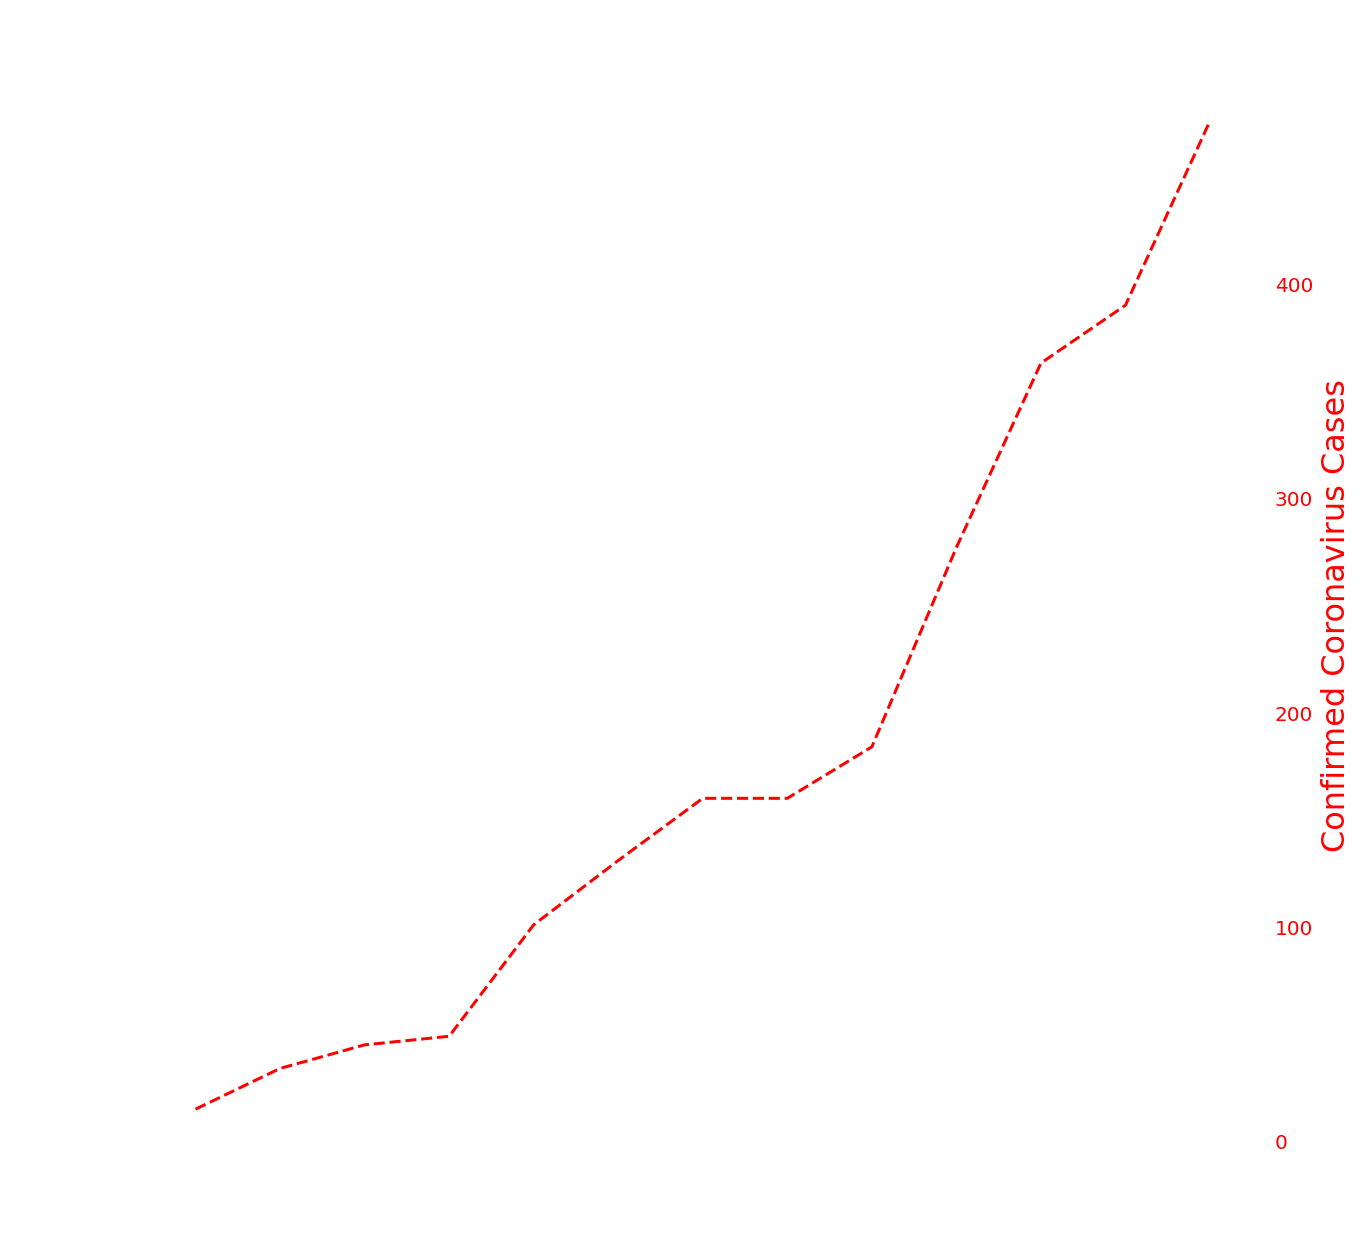

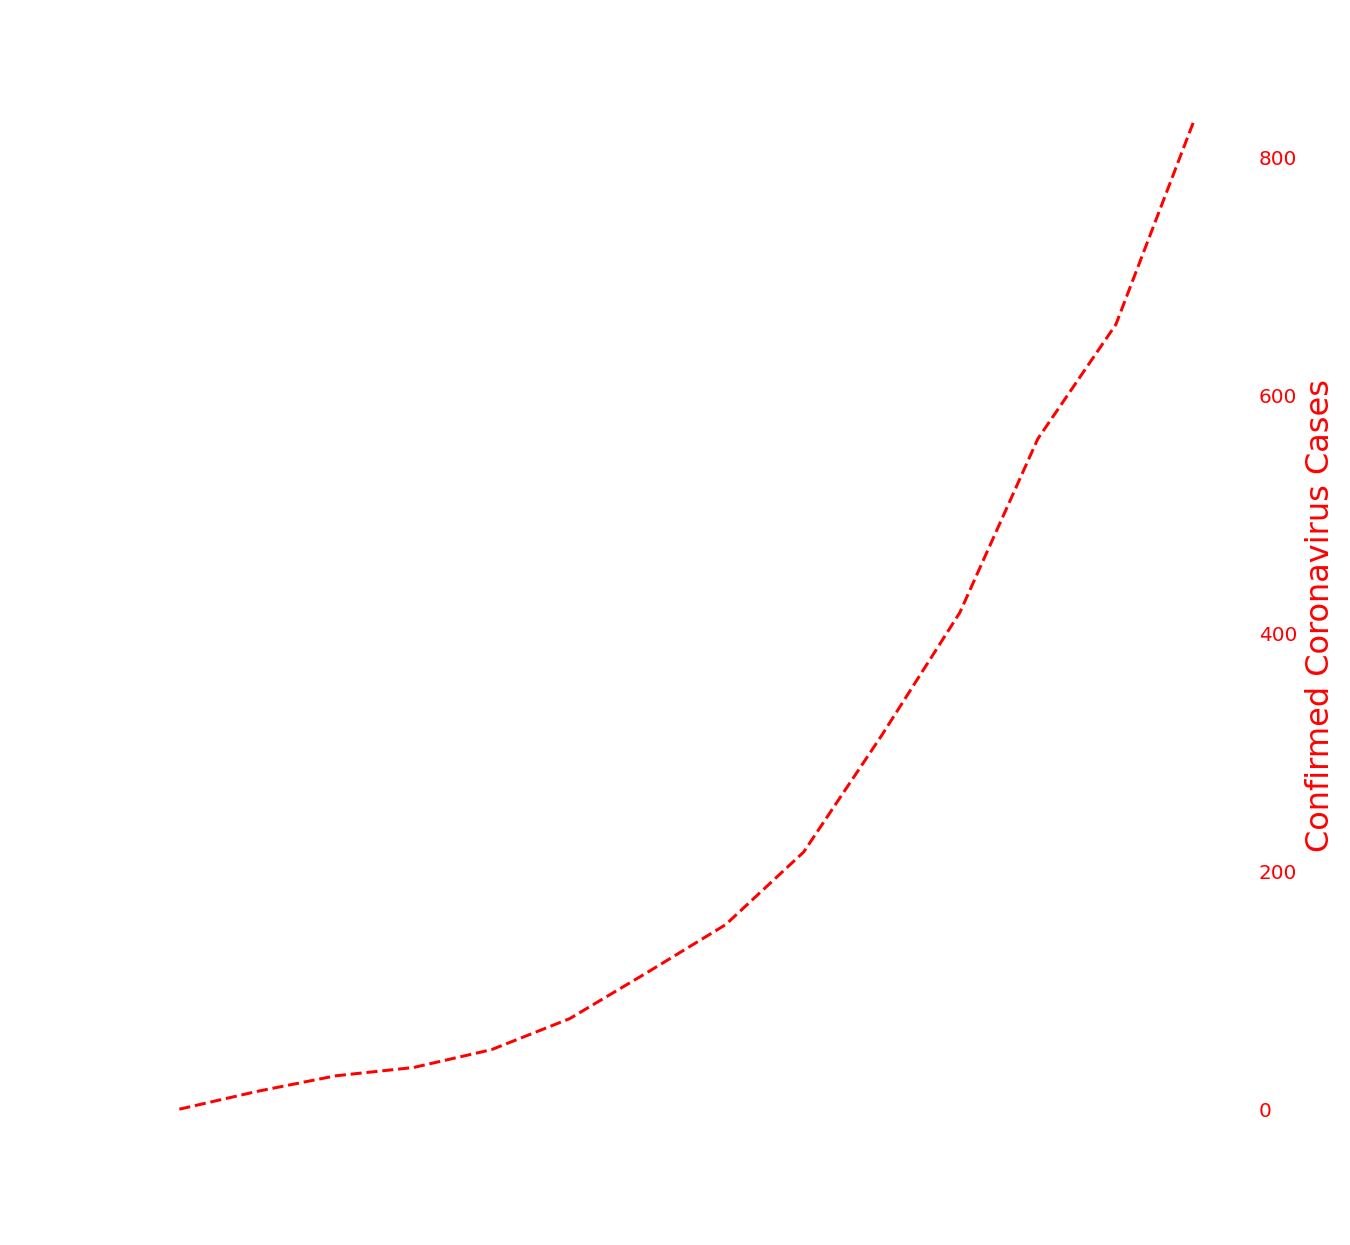

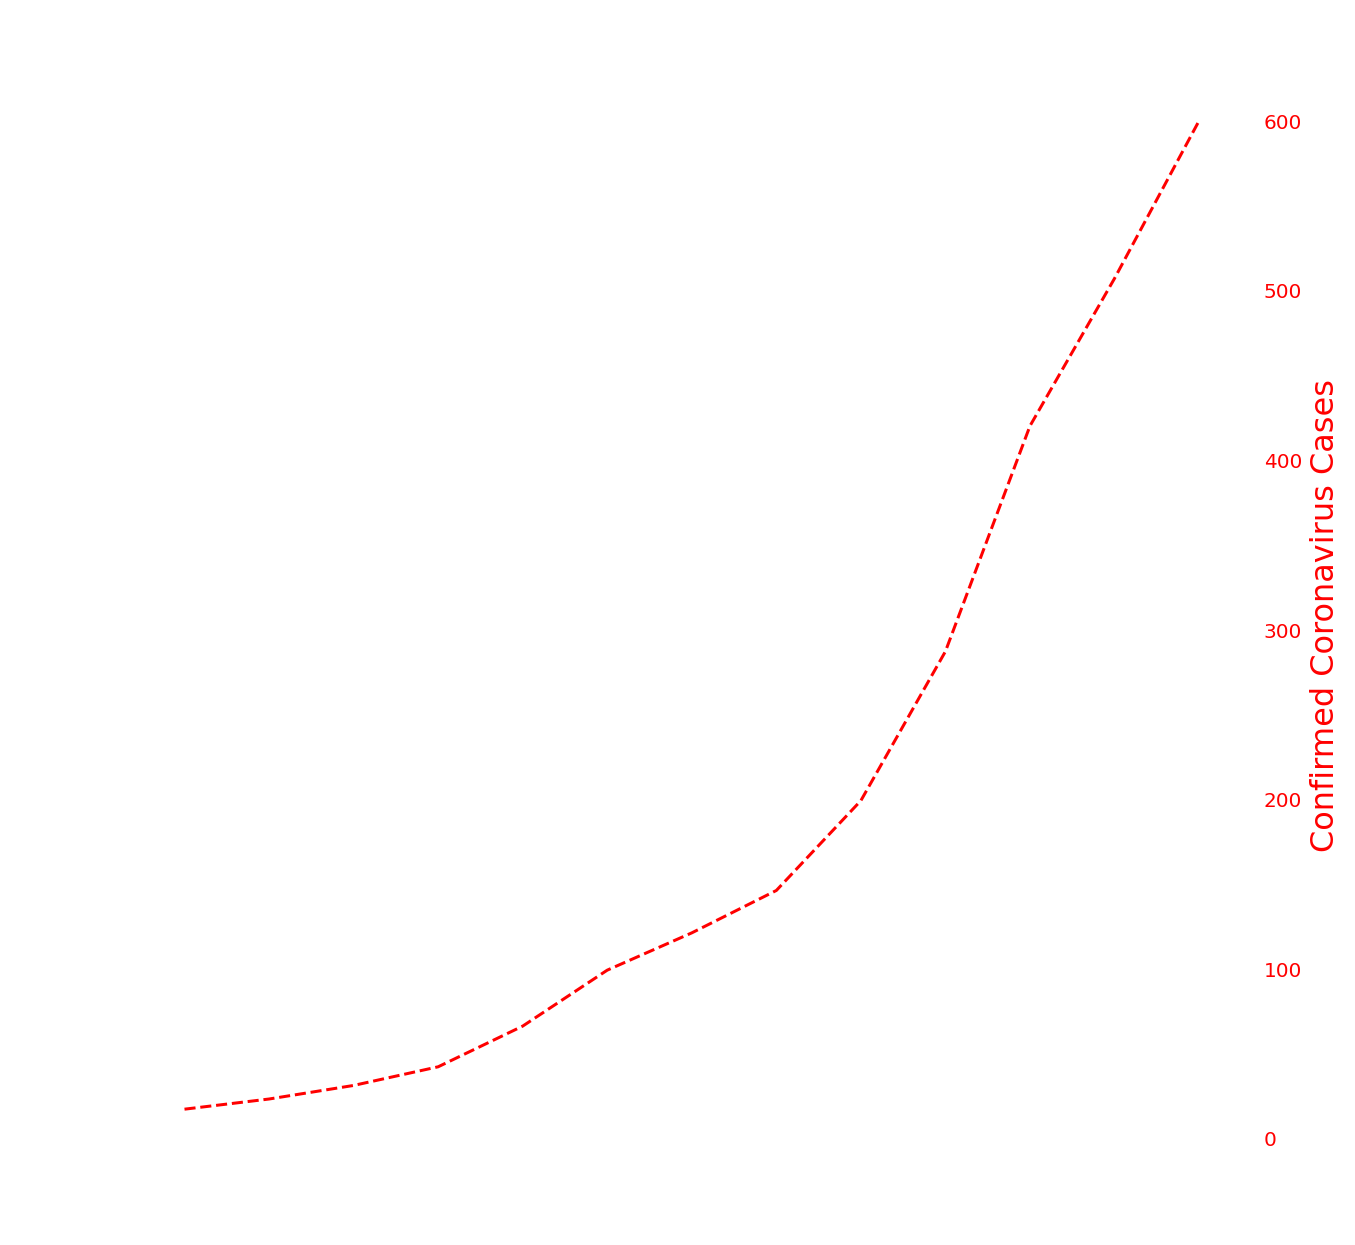

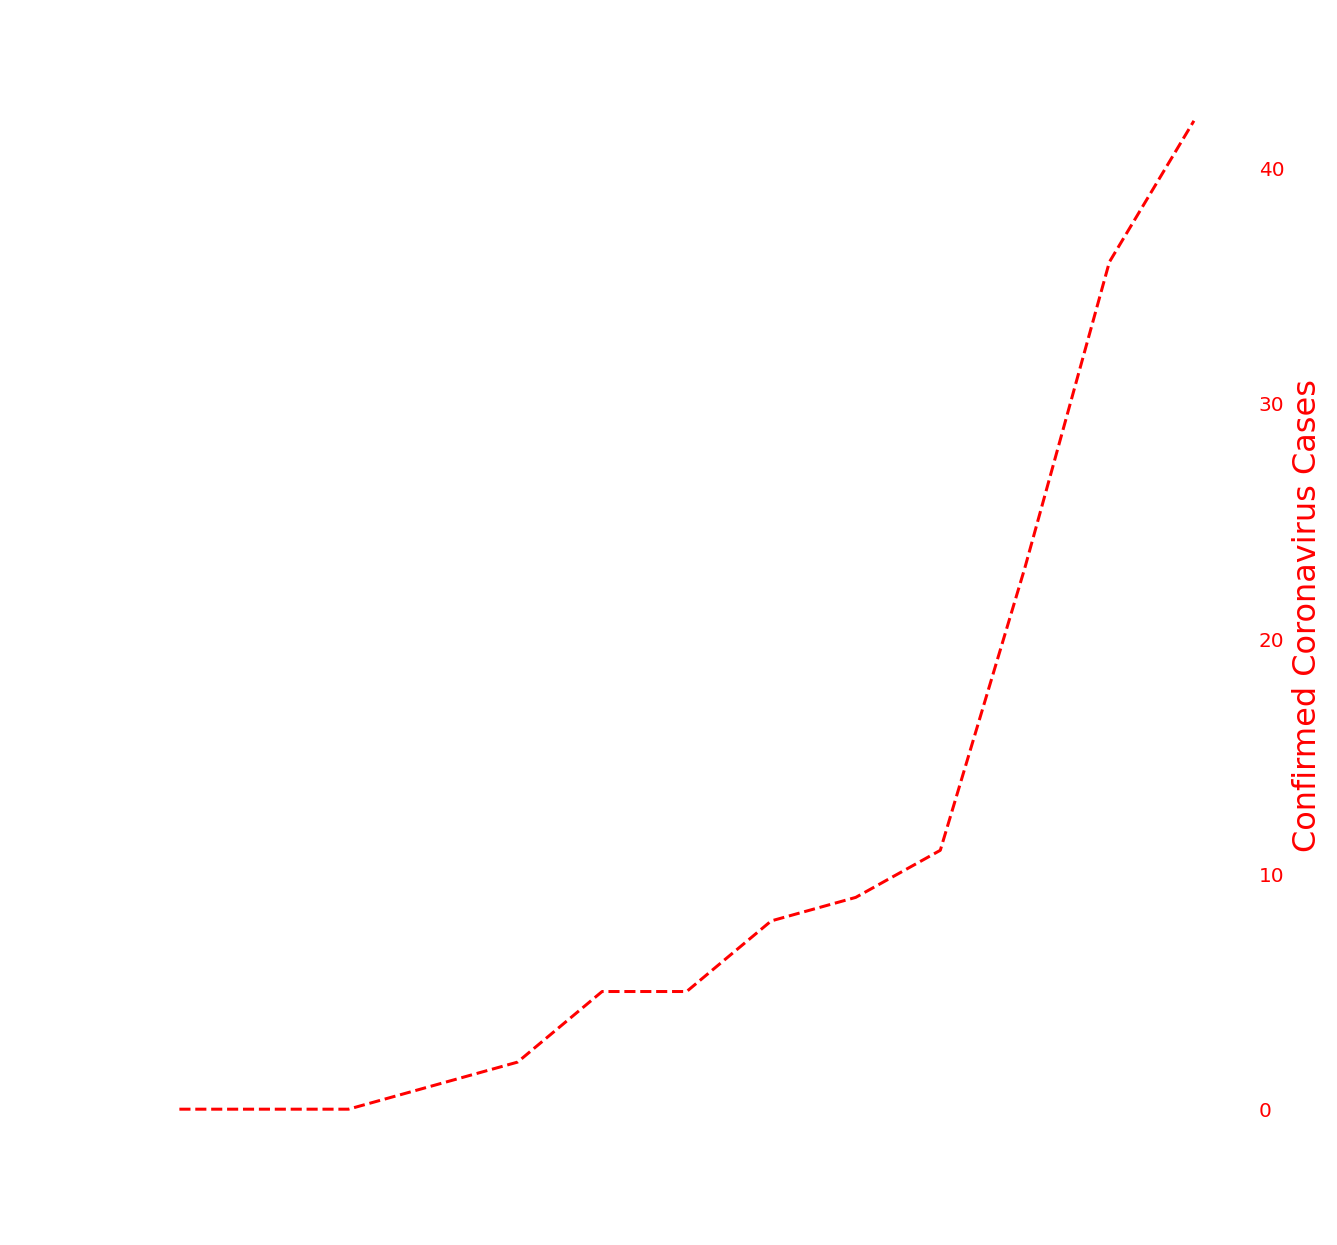

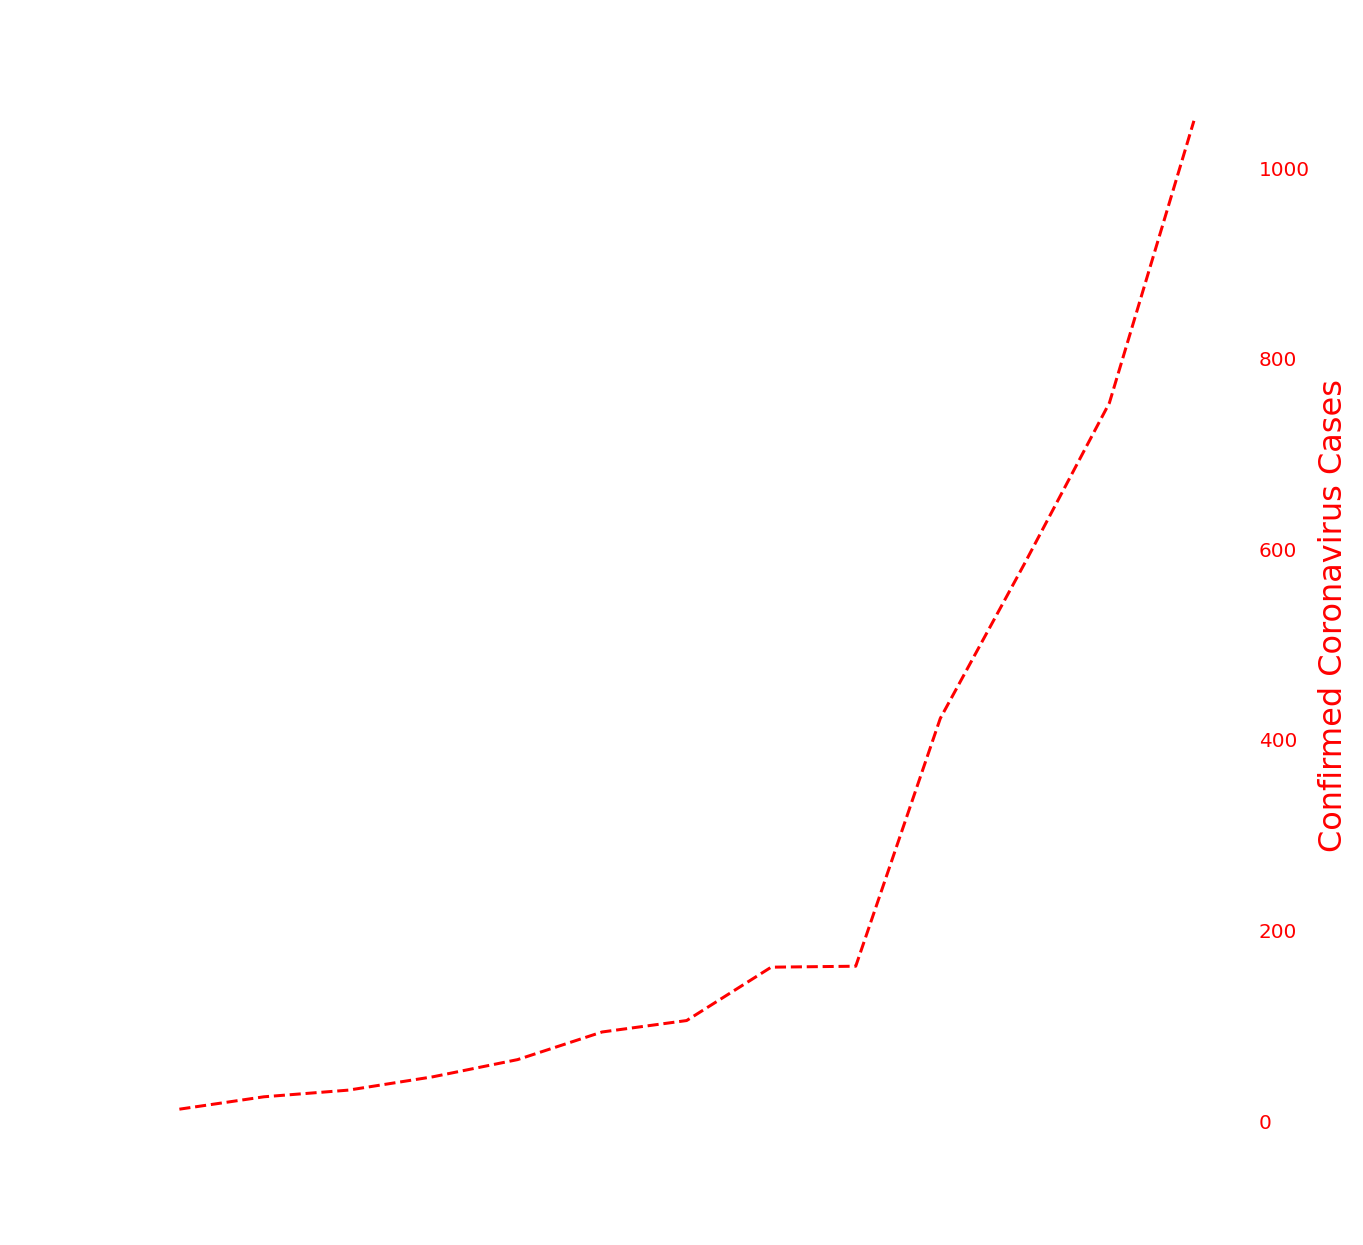

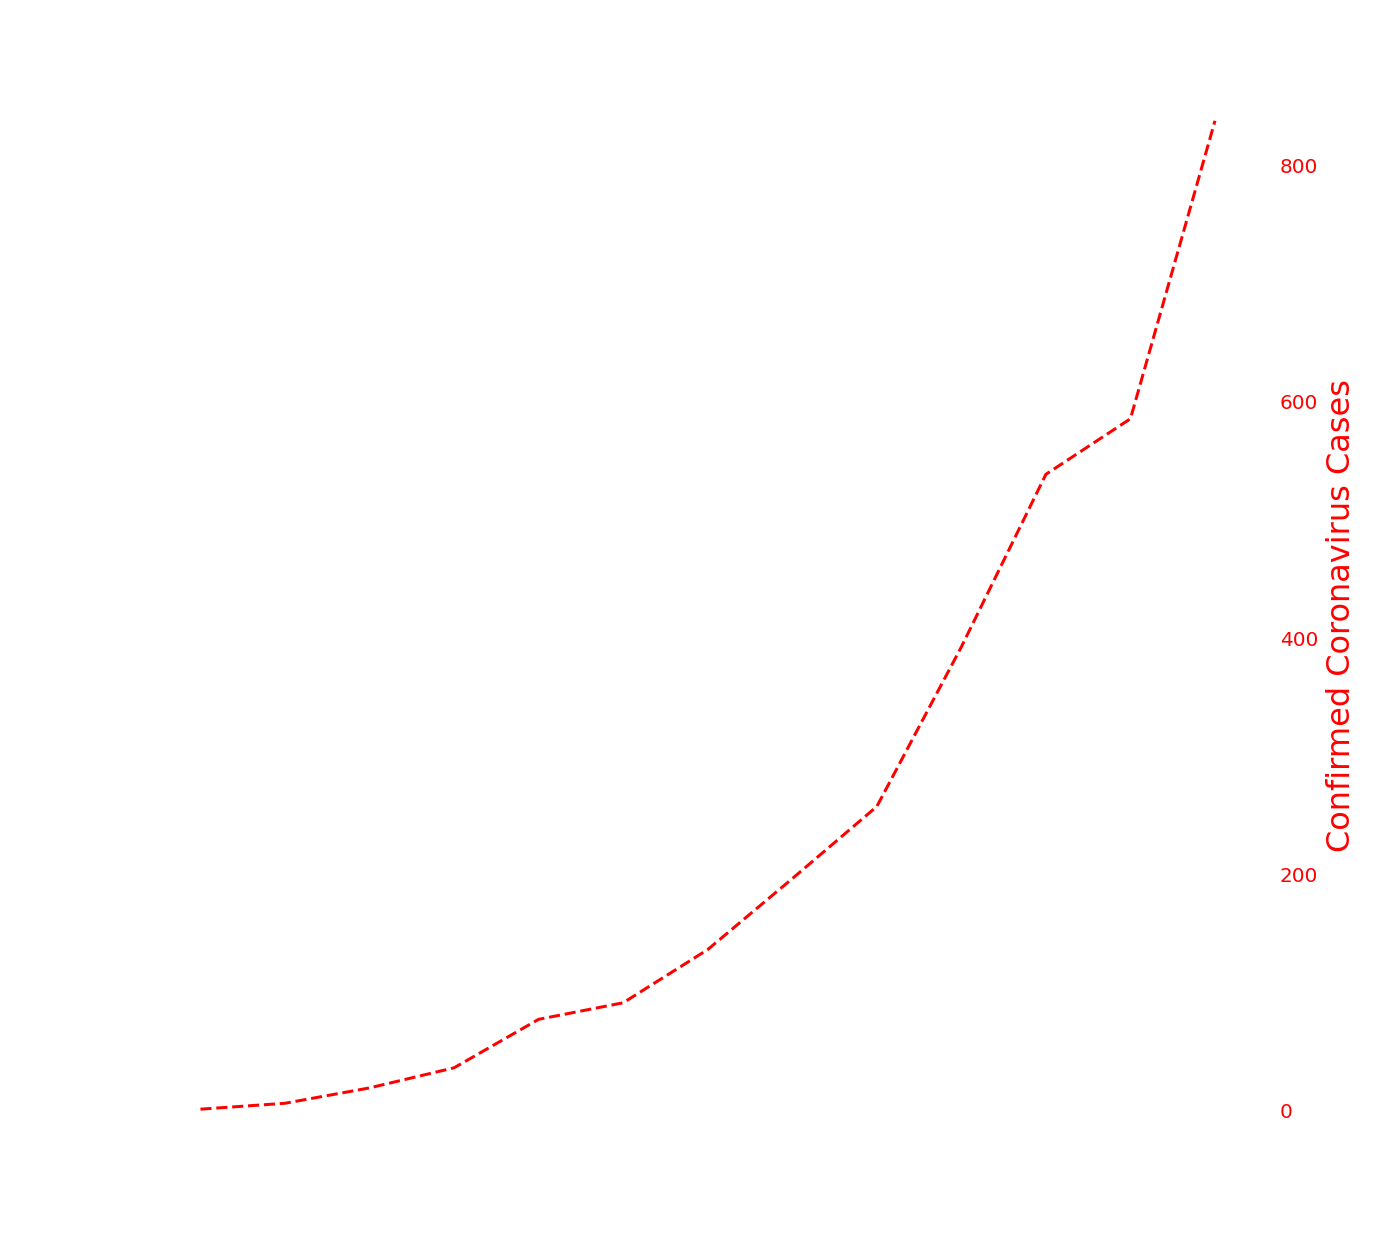

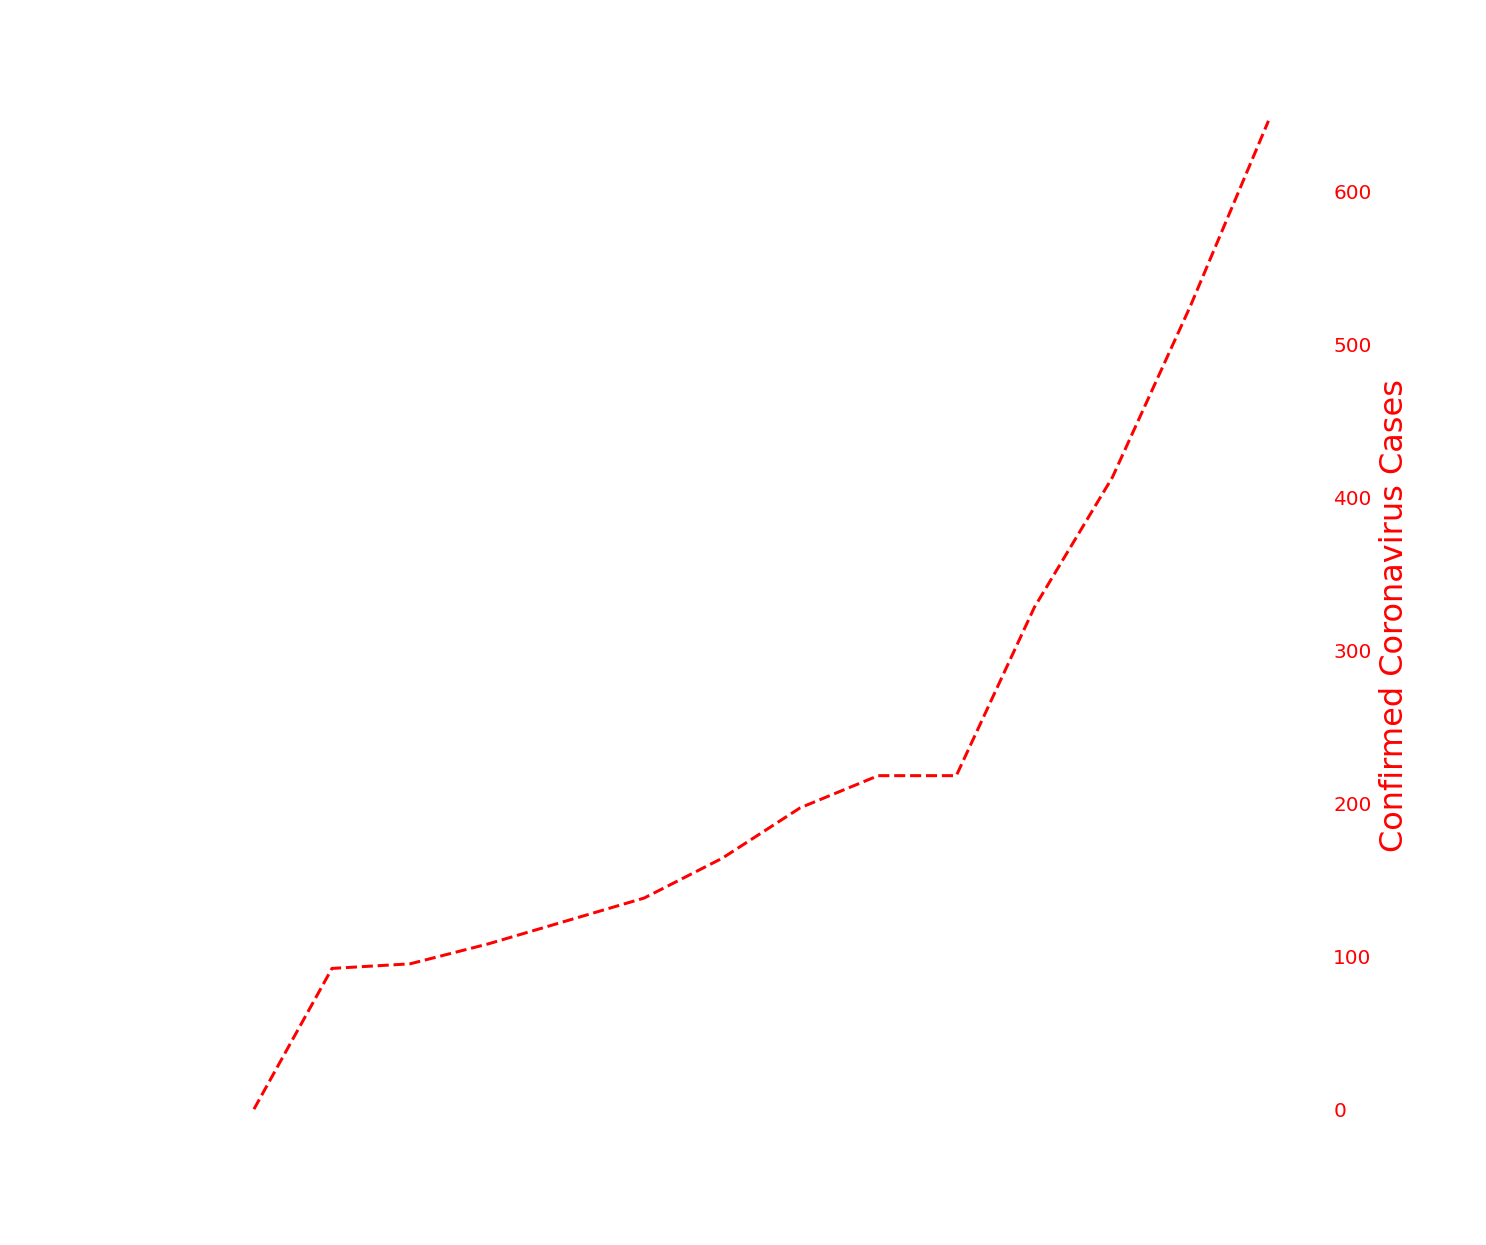

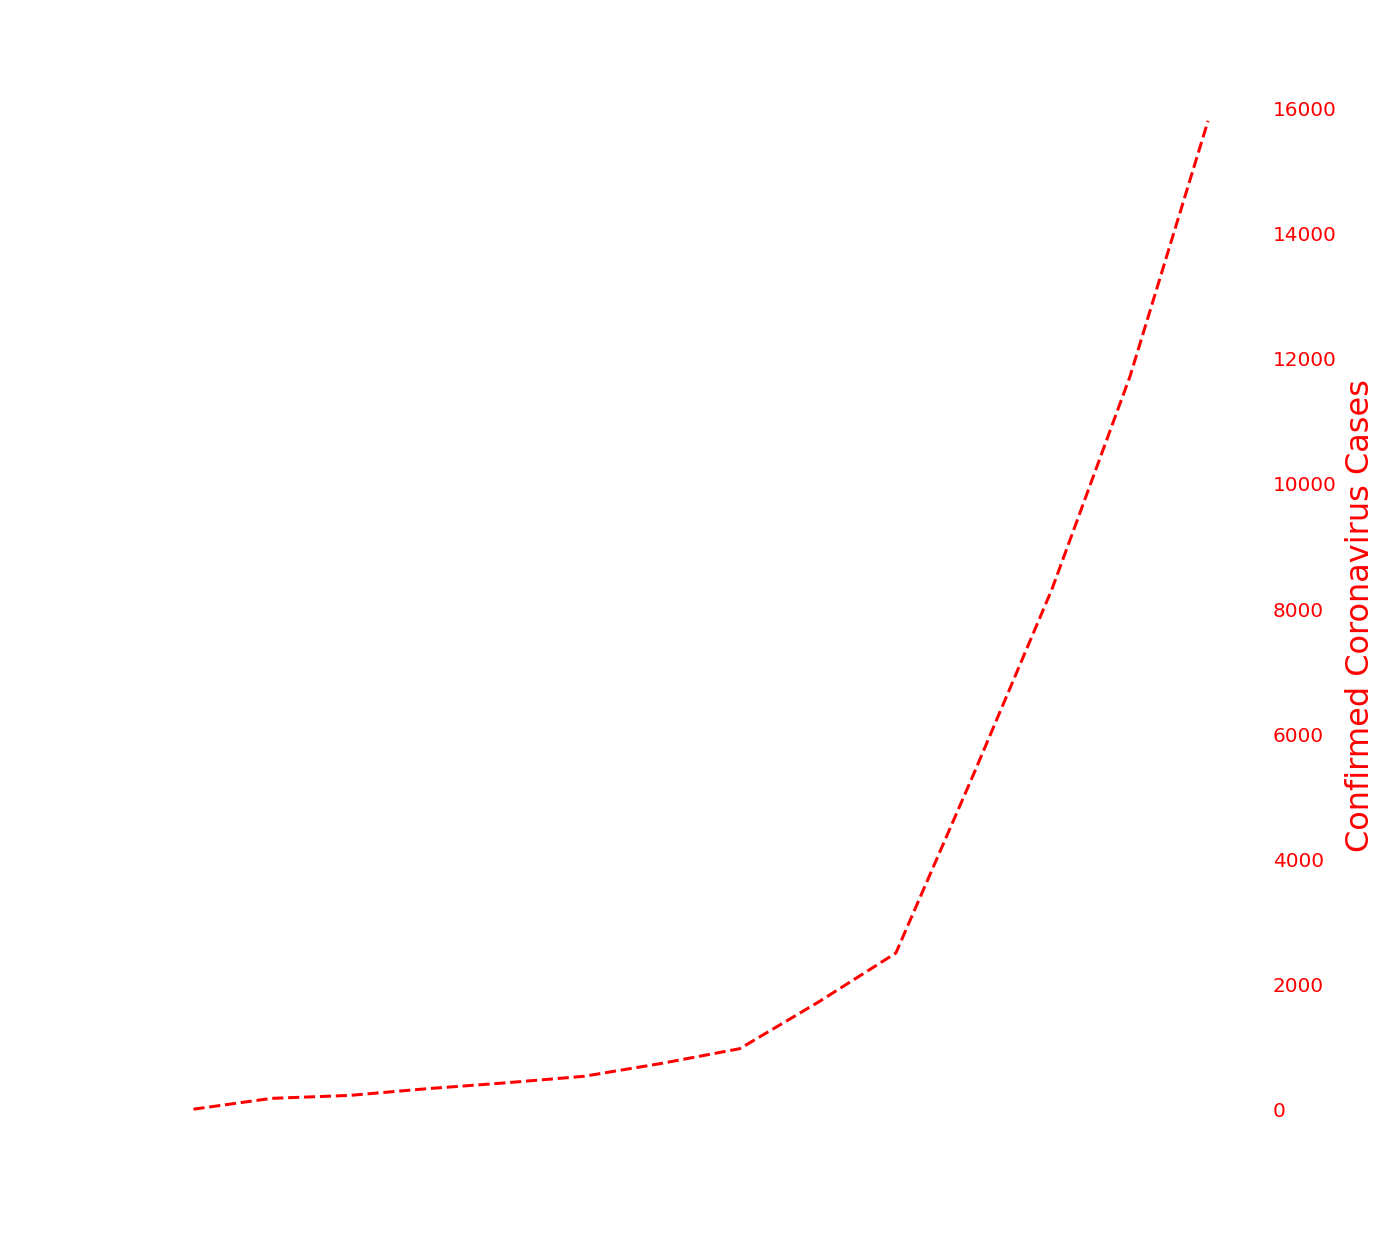

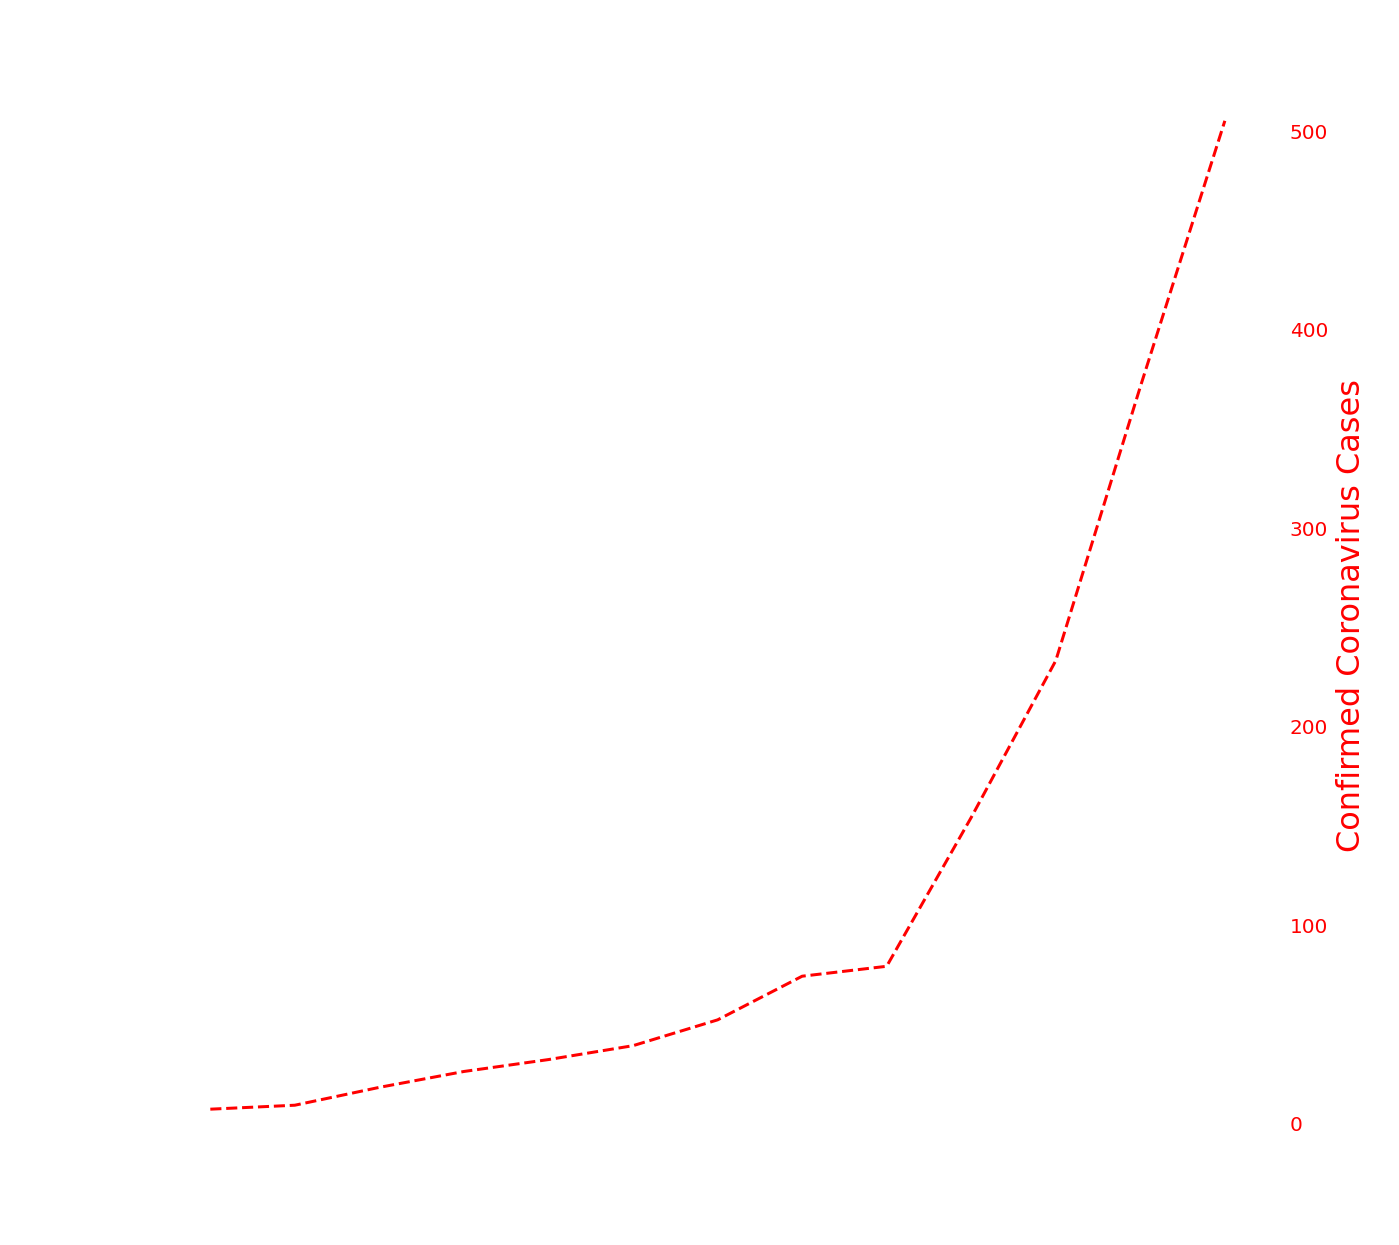

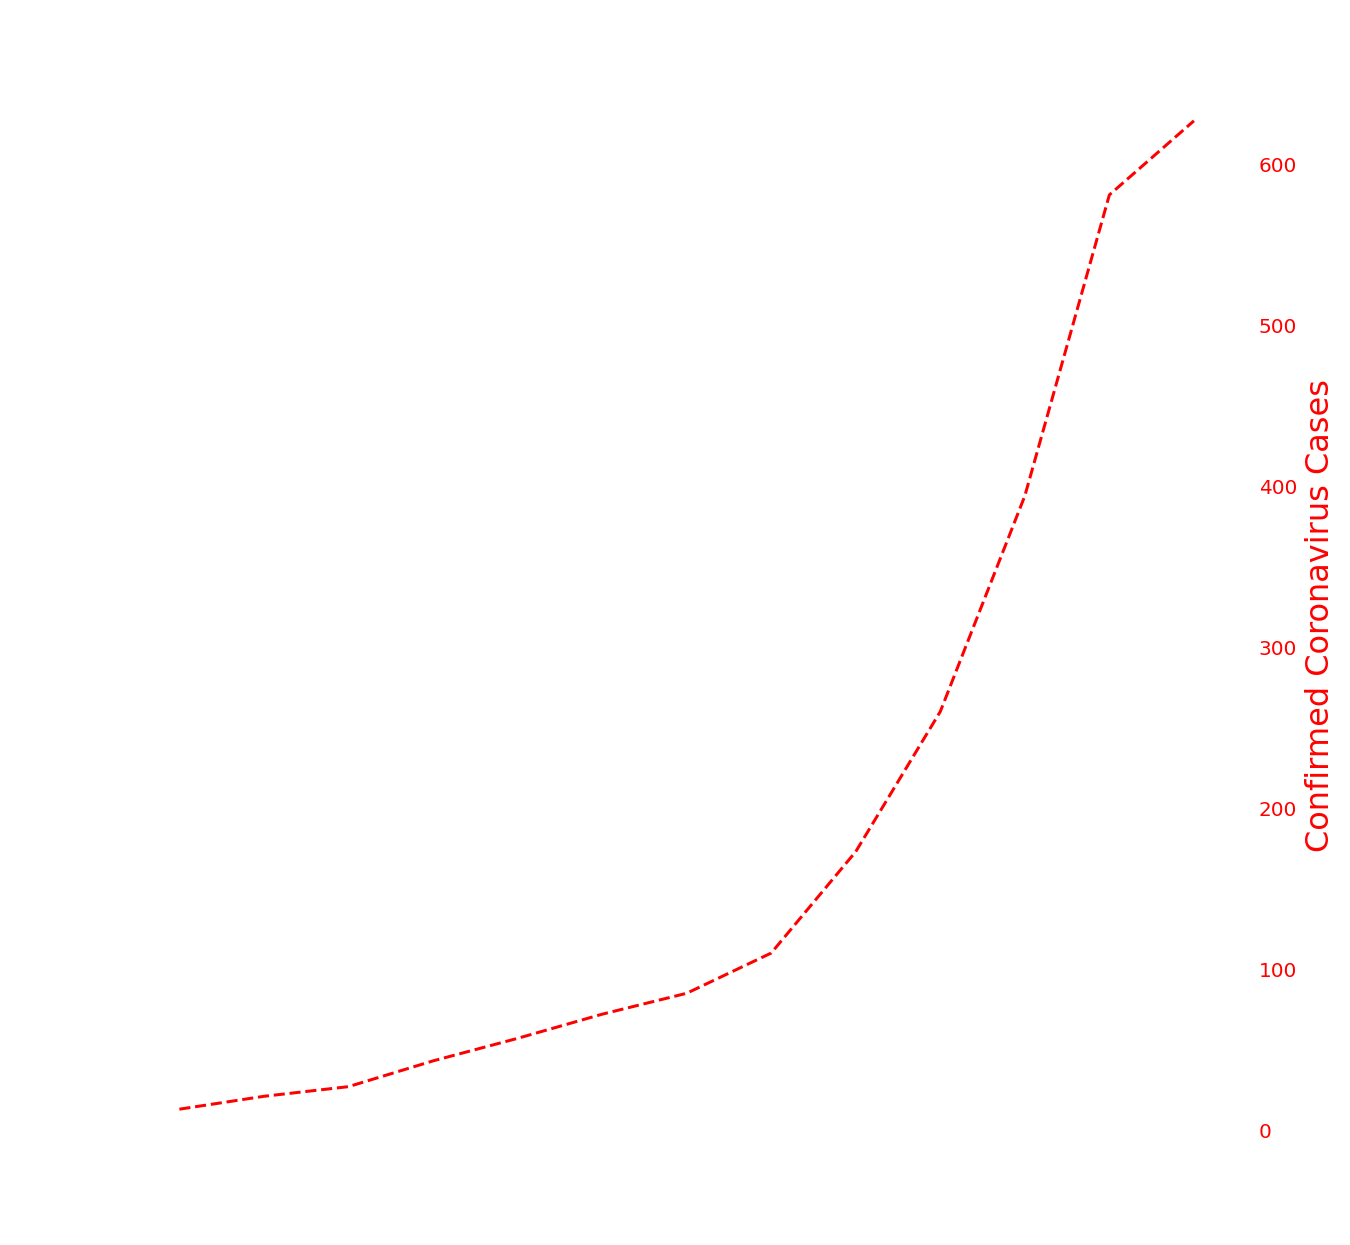

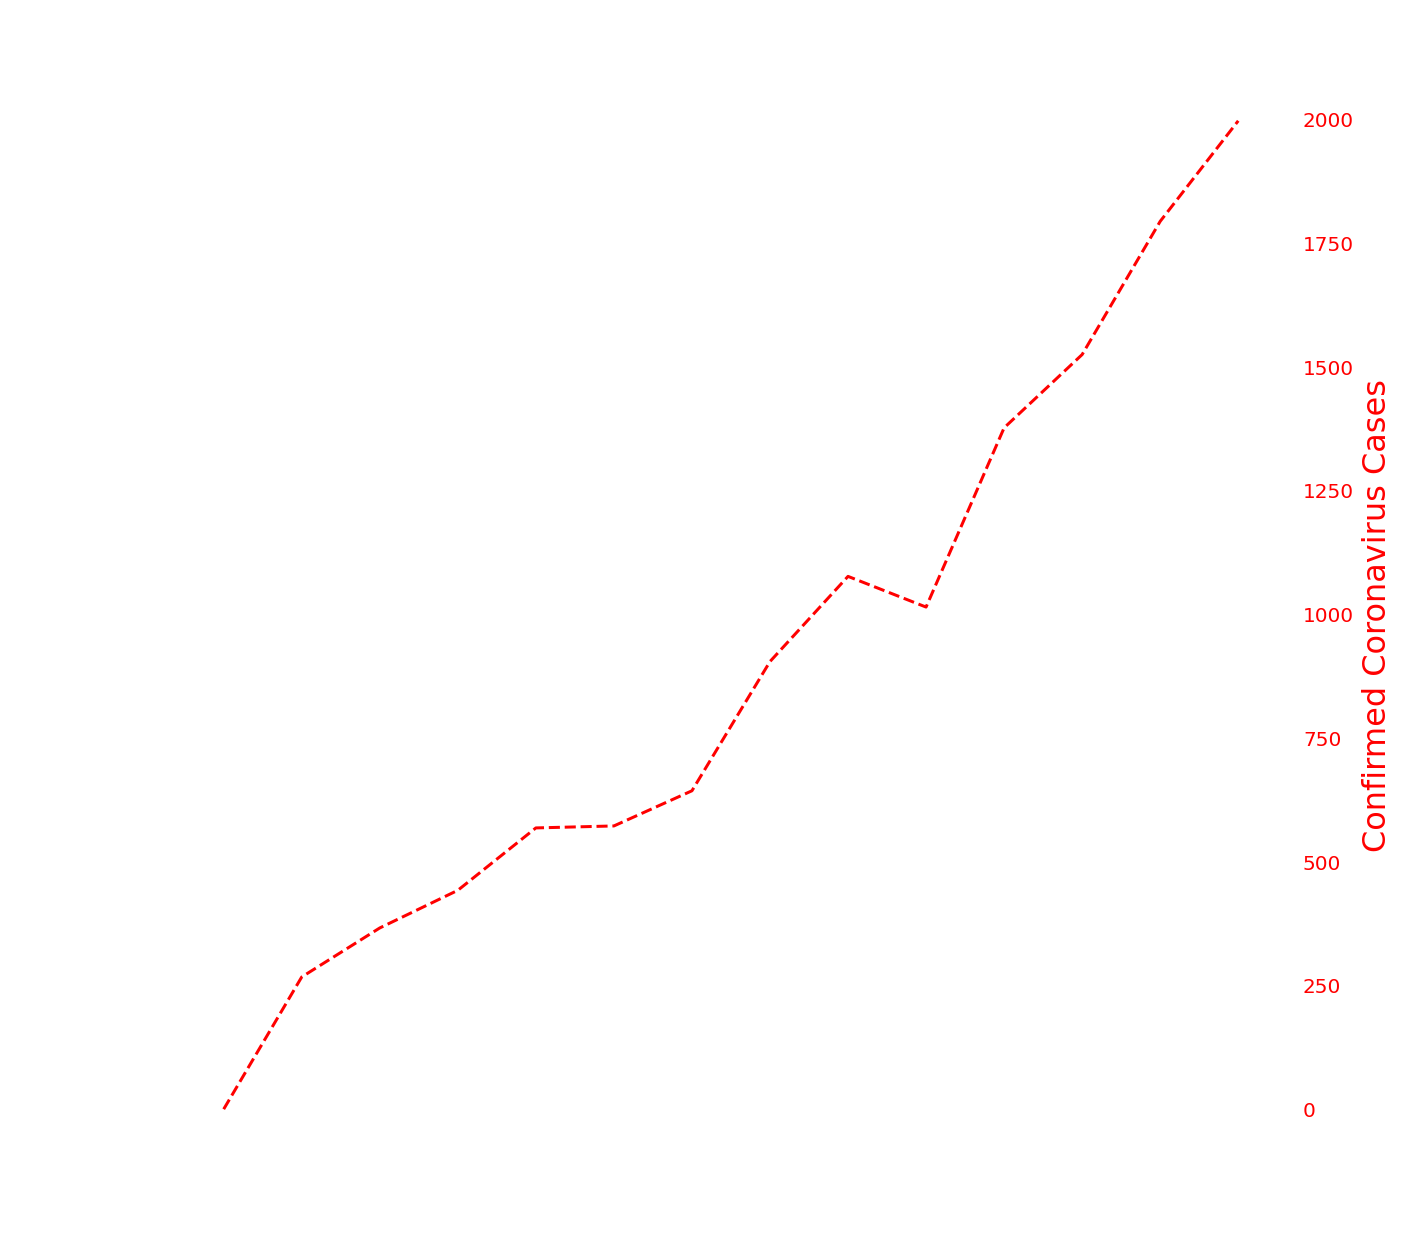

In [222]:
state_list = ['california', 'colorado', 'florida',
              'georgia', 'idaho', 'illinois',
              'louisiana', 'massachusetts', 'newyork',
              'tennessee', 'texas', 'washington']

for state in state_list:
    graphSentimentVsCases(state)

# Graph of U.S. Confirmed Cases Over Time

In [232]:
country_cases = cases_df.groupby(['Country/Region']).sum()

In [237]:
us_cases = country_cases.loc['US']

In [247]:
us_dates = us_cases.keys()[-15:].tolist()

In [281]:
us_dates = [x[:-3] for x in us_dates]

In [248]:
us_cases = us_cases[-15:].tolist()

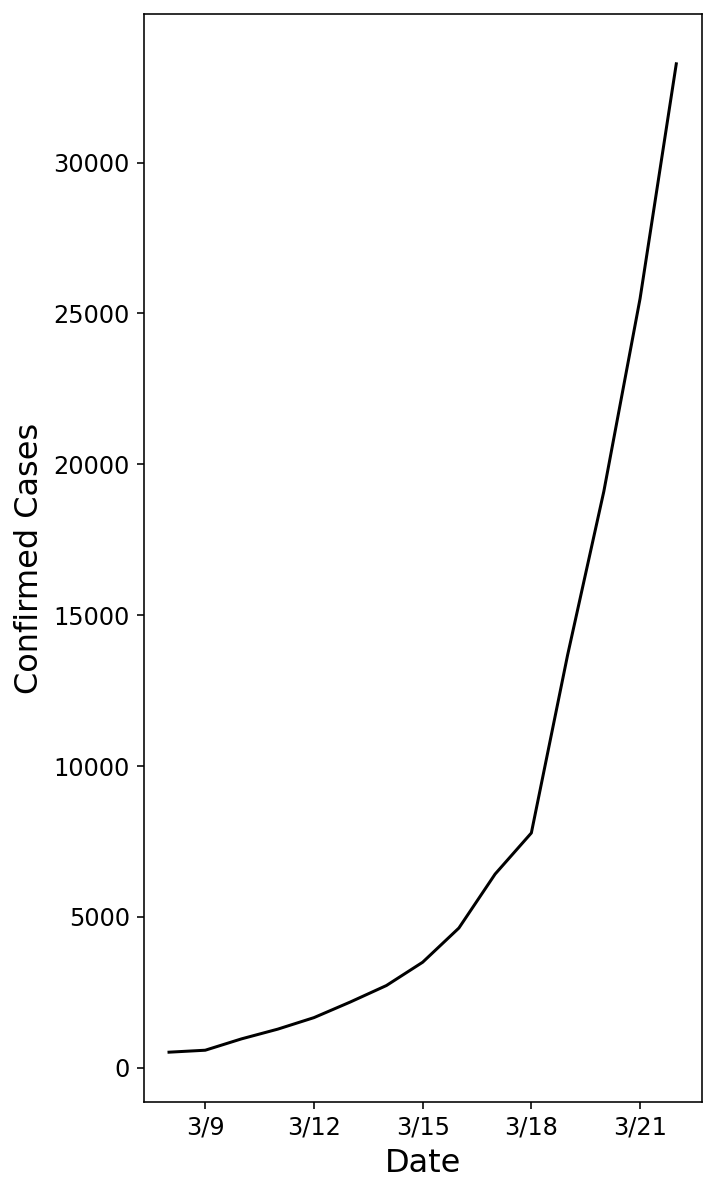

In [299]:
c = 'k'
with plt.rc_context({'axes.edgecolor':c, 'xtick.color':c, 'ytick.color':c, 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(5,10))
    # fig.suptitle(f'United States Confirmed Coronavirus Cases', fontsize=20, y=0.92, color=c)
    ax1 = fig.add_subplot(111)
    ax1.plot(us_dates, us_cases, color=c)
    ax1.set_ylabel('Confirmed Cases', fontsize=16, color=c)
    ax1.set_xlabel('Date', fontsize=16, color=c)
    # ax1.set_xticklabels(us_dates,fontsize=12)  
    ax1.set_xticks(np.arange(1,15, 3.0))
    ax1.tick_params(axis="both", labelsize=12)
    
# plt.savefig(f'tweets/images/us_cases.png', transparent=True, bbox_inches='tight')

# Graph of Topic Sentiment Over Time

In [5]:
pp = pprint.PrettyPrinter(compact = True)

In [86]:
def graphTopicSentiment(state, common=True, topics=[]):
    if common:
        doc_topic_nmf = pickle.load(open(f'tweets/models/{state}/{state}_common_doctopic.pkl', 'rb'))
    else: 
        doc_topic_nmf = pickle.load(open(f'tweets/models/{state}/{state}_specific_topics.pkl', 'rb'))
        
    df = pd.read_csv(f'tweets/tweets_processed/coronavirus_{state}_tweets_processed', engine = 'python')
    best_topic_nmf = [x.argmax() for x in doc_topic_nmf]
    df['topic'] = best_topic_nmf
    
    df = df[df['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
    df['date'] = df['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d') if type(x) == str else '0.0')
    df = df[df['date'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in

    date_topic_df = pd.DataFrame(df.groupby(['date', 'topic'])['sentiment'].mean()).reset_index()
    date_topic_pivot = date_topic_df.pivot(index = 'date', columns='topic', values='sentiment')
    
    if common:
        state_topics = pickle.load(open(f'tweets/models/{state}/{state}_common_topics.txt', 'rb'))
    else: 
        state_topics = pickle.load(open(f'tweets/models/{state}/{state}_specific_topics.txt', 'rb'))
    
    dates = [x.strftime('%Y/%m/%d %H:%M:%S')[5:10] for x in date_topic_pivot[0].keys().tolist()] 
    topic_sentiments = [date_topic_pivot[x] for x in range(5)]
    
    c = 'w'
    # cm = plt.cm.Pastel1(range(0,5))
    cm = ['yellow', 'lime', 'white', 'cyan', 'orange']
    plots = []
    plt.style.use('default')
    
    with plt.rc_context({'axes.edgecolor':c, 'xtick.color':c, 'ytick.color':c, 'figure.facecolor':'white'}):
        fig = plt.figure(figsize=(10,10))
        # fig.suptitle(f'United States Confirmed Coronavirus Cases', fontsize=20, y=0.92, color=c)
        ax1 = fig.add_subplot(111)
        
        for i, sentiment in enumerate(topic_sentiments):
            if len(topics) > 0:
                p = ax1.plot(dates, sentiment, label=topics[i], color=cm[i])
            else:
                p = ax1.plot(dates, sentiment, label=f'Topic {i}', color=cm[i])
            plots.append(p)
        # ax1.plot(dates, us_cases, color=c)
        ax1.set_ylabel('Average Sentiment', fontsize=20, color=c)
        ax1.set_xlabel('Date', fontsize=20, color=c)
        # ax1.set_xticklabels(us_dates,fontsize=12)  
        # ax1.set_xticks(np.arange(1,15, 3.0))
        for label in ax1.xaxis.get_ticklabels()[::2]:
            label.set_visible(False)
        ax1.tick_params(axis="both", labelsize=16)
        legend = ax1.legend([p[0] for p in plots], topics, fontsize=20, facecolor = '#05356ecb',  framealpha=1, frameon = True, edgecolor='black', loc='upper center', bbox_to_anchor=(1.35, 0.8), shadow=True, ncol=1)
        plt.setp(legend.get_texts(), color=c)
        # ax1.legend()
        
    pp.pprint(state_topics)
    plt.savefig(f'tweets/images/{state}_topicsentiment.png', transparent=True, bbox_inches='tight')
    # date_topic_pivot.plot()

{'topic0': ['united state', 'state case', 'across united', 'donald trump',
            'case united', 'york time', 'state death', 'president trump',
            'state response', 'death toll', 'travel ban', 'state via',
            'via nyt', 'state economy', 'people united', 'travel europe',
            'president donald', 'confirmed case', 'state health',
            'europe united', 'spread united', 'state testing',
            'president united', 'state airport', 'public health',
            'health official', 'update united', 'washington post', 'sick leave',
            'state stock'],
 'topic1': ['ron desantis', 'sign petition', 'petition via', 'governor ron',
            'rent mortgage', 'suspend rent', 'amp utility', 'mortgage amp',
            'utility payment', 'desantis suspend', 'governor governor',
            'payment sign', 'gov ron', 'outbreak sign', 'ivy league',
            'year eligibility', 'eligibility outbreak', 'ncaa allow',
            'league studentathletes',

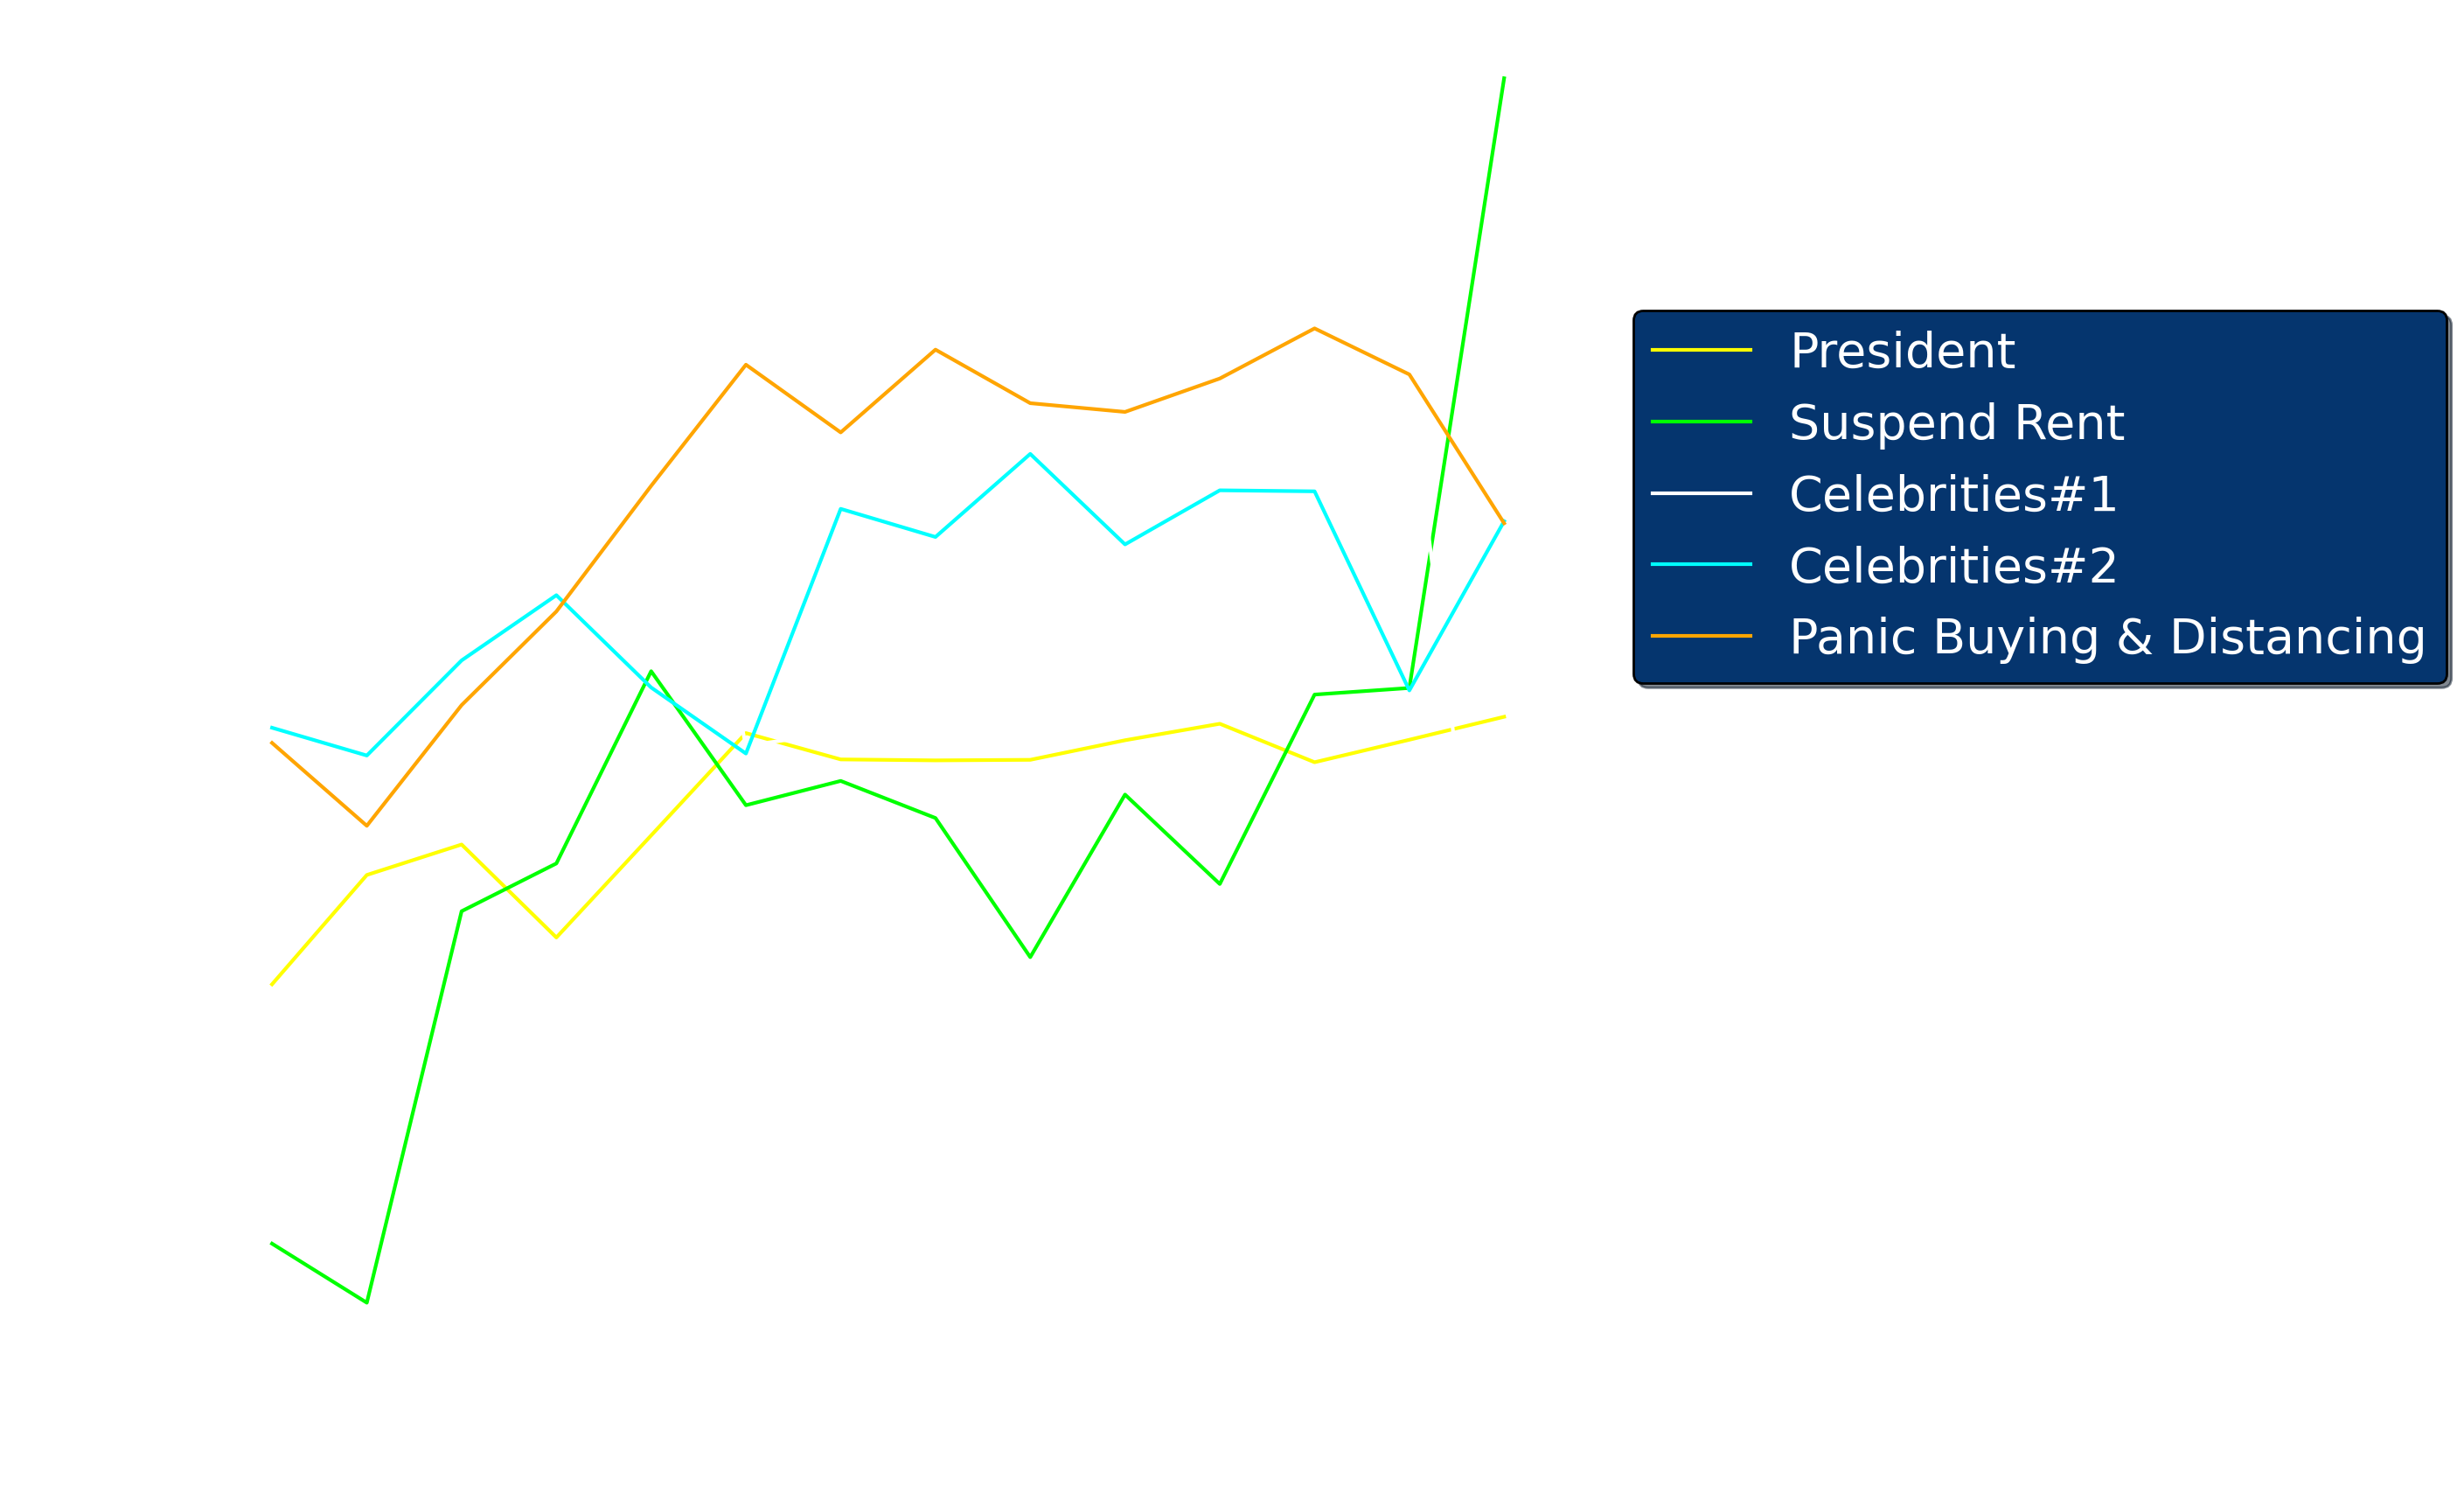

In [87]:
florida_topics = ['President', 'Suspend Rent', 'Celebrities#1', 'Celebrities#2', 'Panic Buying & Distancing']
graphTopicSentiment('florida', common=True, topics=florida_topics)

{'topic0': ['united state', 'state case', 'case united', 'across united',
            'state response', 'york time', 'confirmed case', 'donald trump',
            'president trump', 'state economy', 'state government', 'state via',
            'back united', 'state testing', 'delay testing', 'testing set',
            'set back', 'younger adult', 'state stock', 'everywhere already',
            'already delay', 'update united', 'hospitalization united',
            'travel ban', 'public health', 'travel europe', 'state health',
            'people united', 'spread united', 'president donald'],
 'topic1': ['stay home', 'home stay', 'home order', 'gavin newsom', 'gov gavin',
            'wash hand', 'resident stay', 'people stay', 'californian stay',
            'please stay', 'stay safe', 'ordered stay', 'newsom order',
            'stop spread', 'home avoid', 'order californian', 'statewide stay',
            'million people', 'home except', 'public health', 'order resident',
         

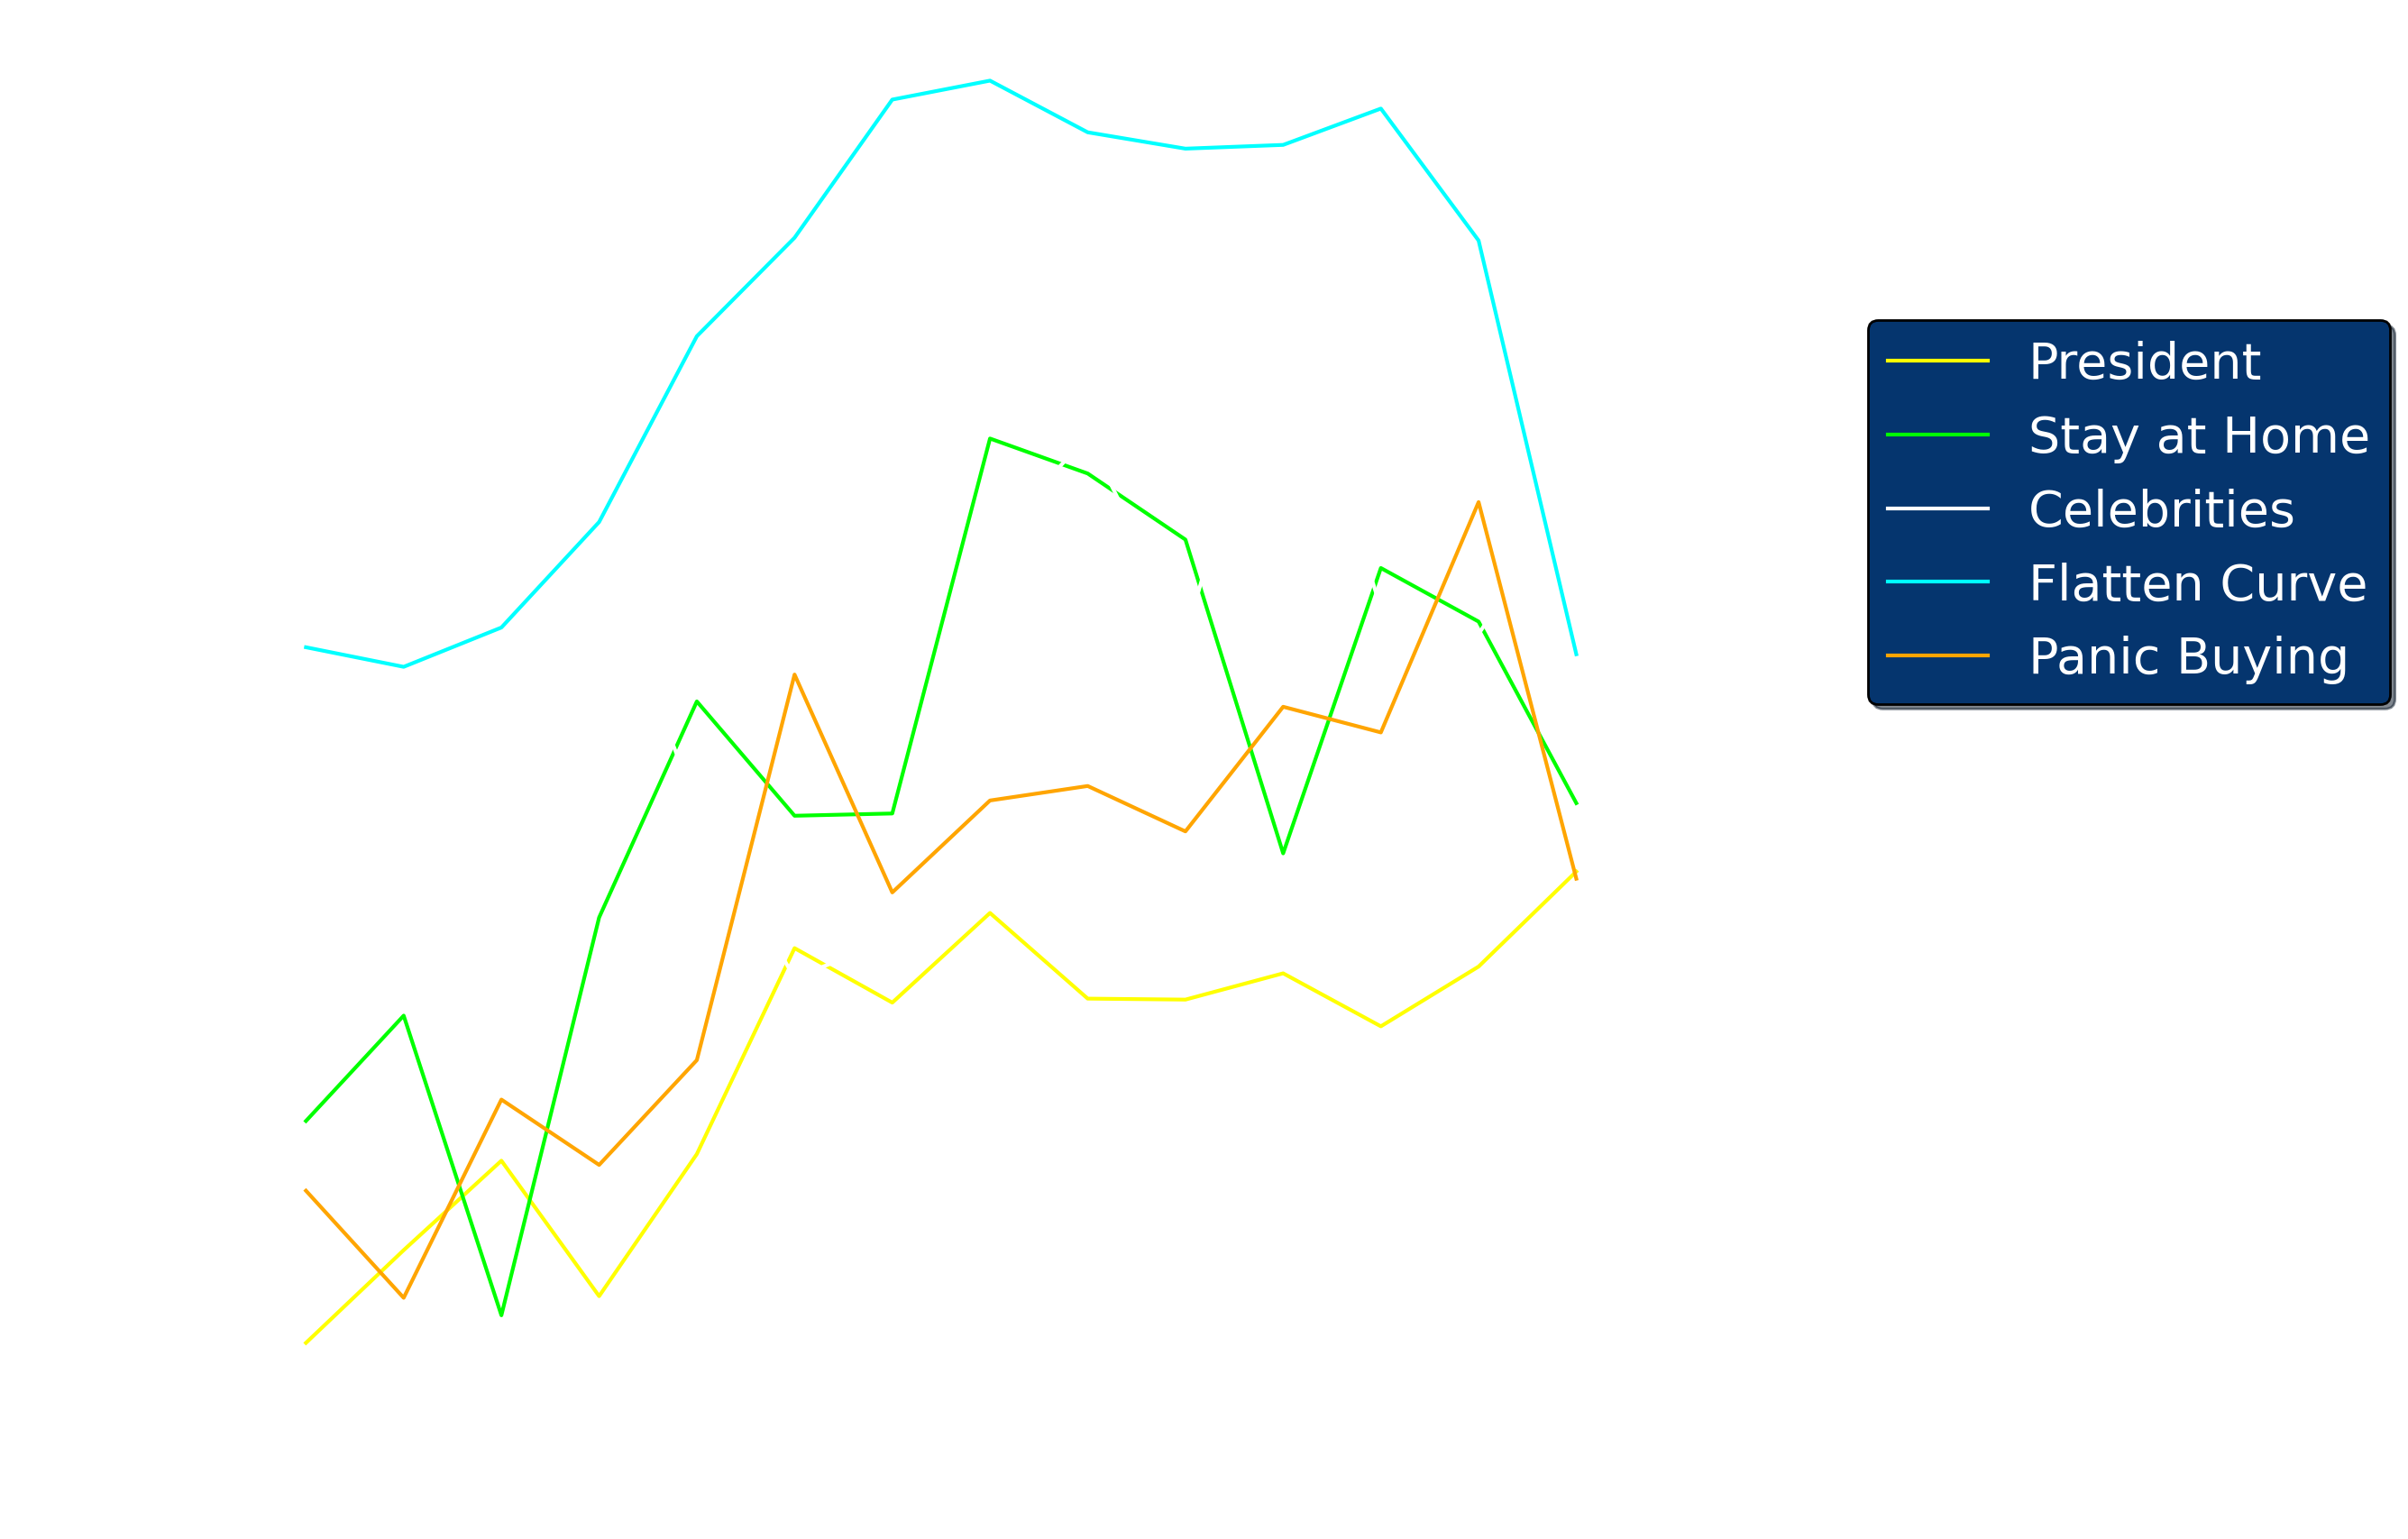

In [88]:
california_topics = ['President', 'Stay at Home', 'Celebrities', 'Flatten Curve', 'Panic Buying']
graphTopicSentiment('california', common=True, topics=california_topics)

# Graphing California and Florida on Same Graph for Average Sentiment and Confirmed Coronavirus Cases

In [79]:
df_california = pd.read_csv(f'tweets/tweets_processed/coronavirus_california_tweets_processed', engine = 'python')
df_california = df_california[df_california['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
df_california['date'] = df_california['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d') if type(x) == str else '0.0')
df_california = df_california[df_california['date'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in

dates_california = df_california.groupby(['date'])['sentiment'].mean().keys().tolist()
dates_california = [x.strftime('%Y/%m/%d %H:%M:%S')[5:10] for x in dates_california] 
average_sentiment_california = df_california.groupby(['date'])['sentiment'].mean().tolist()

df_florida = pd.read_csv(f'tweets/tweets_processed/coronavirus_florida_tweets_processed', engine = 'python')
df_florida = df_florida[df_florida['created_at'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in
df_florida['date'] = df_florida['created_at'].apply(lambda x: datetime.strptime(x[:10], '%Y-%m-%d') if type(x) == str else '0.0')
df_florida = df_florida[df_florida['date'] != '0.0'] # if a created_at timestamp is not properly done, twitter has 0.0 filled in

dates_florida = df_florida.groupby(['date'])['sentiment'].mean().keys().tolist()
dates_florida = [x.strftime('%Y/%m/%d %H:%M:%S')[5:10] for x in dates_florida] 

average_sentiment_florida = df_florida.groupby(['date'])['sentiment'].mean().tolist()

state_cases_california = cases_df[cases_df['Province/State'] == 'california']
state_cases_california = state_cases_california.iloc[:,-len(dates_california):].transpose()
state_cases_california.columns = ['california']
state_cases_california = state_cases_california['california'].tolist()

state_cases_florida = cases_df[cases_df['Province/State'] == 'florida']
state_cases_florida = state_cases_florida.iloc[:,-len(dates_florida):].transpose()
state_cases_florida.columns = ['florida']
state_cases_florida = state_cases_florida['florida'].tolist()

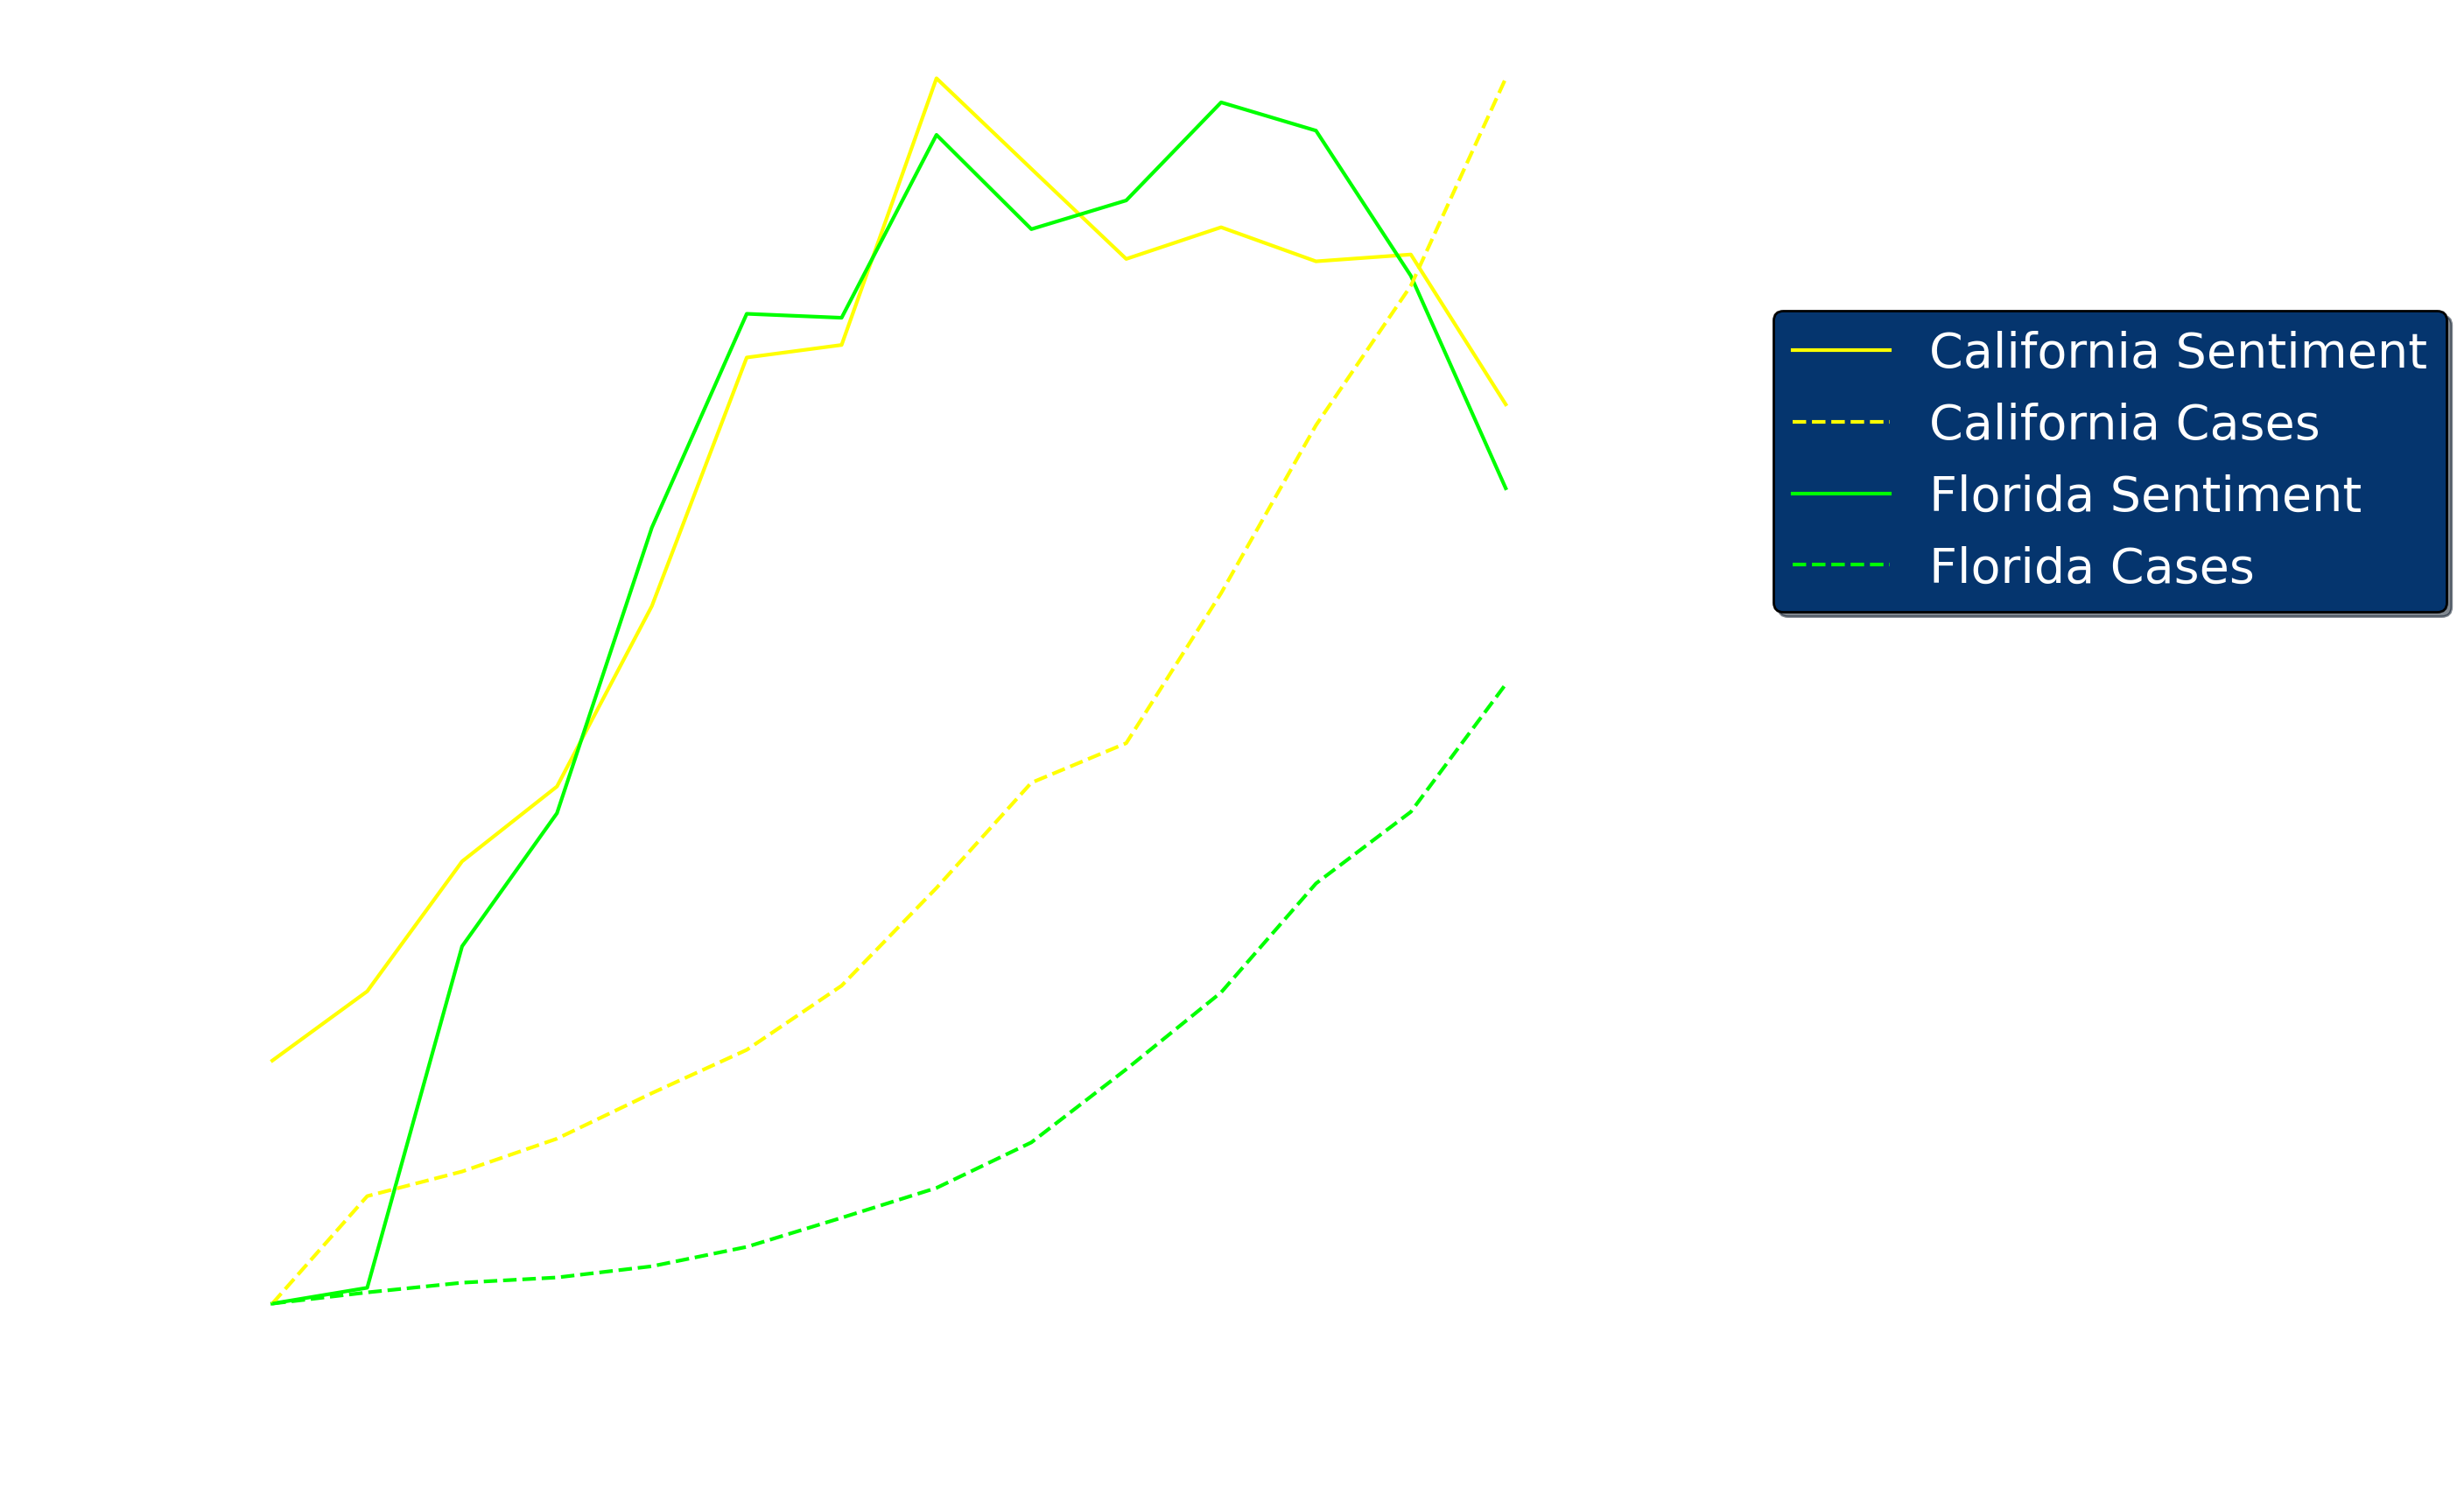

In [84]:
plots = []

with plt.rc_context({'axes.edgecolor':'white', 'xtick.color':'white', 'ytick.color':'white', 'figure.facecolor':'white'}):
    fig = plt.figure(figsize=(10,10))
    # fig.suptitle(f'California and Florida Average Sentiment against Confirmed Coronavirus Cases', fontsize=20, y=0.92, color='w')
    ax1 = fig.add_subplot(111)
    sen_cal = ax1.plot(dates_california, average_sentiment_california, color='yellow')
    sen_flo = ax1.plot(dates_florida, average_sentiment_florida, color='lime')

    ax1.set_ylabel('Average Sentiment Over Time', fontsize=20, color='w')
    ax1.set_xlabel('Date', fontsize=20, color='w')

    for label in ax1.xaxis.get_ticklabels()[::2]:
        label.set_visible(False)
        
    ax1.tick_params(axis="both", labelsize=16)
    
    ax2 = ax1.twinx()
    cas_cal = ax2.plot(dates_california, state_cases_california, color ='yellow', linestyle='dashed')
    cas_flo = ax2.plot(dates_florida, state_cases_florida, color='lime', linestyle='dashed')
    ax2.tick_params(axis="both", labelsize=16)
    ax2.set_ylabel('Confirmed Coronavirus Cases (Dotted)', color='w', fontsize=20)
    for t1 in ax2.get_yticklabels():
        t1.set_color('w')
    
    plots.append(sen_cal)
    plots.append(cas_cal)
    plots.append(sen_flo)
    plots.append(cas_flo)
    
    legend = ax1.legend([p[0] for p in plots], ['California Sentiment', 'California Cases', 'Florida Sentiment', 'Florida Cases'], fontsize=20, facecolor = '#05356ecb',  framealpha=1, frameon = True, edgecolor='black', loc='upper center', bbox_to_anchor=(1.4, 0.8), shadow=True, ncol=1)
    plt.setp(legend.get_texts(), color='w')
    
#         ax1_line = Line2D([0], [0], lw=1, label='Average Sentiment')
#         ax2_line = Line2D([0], [0], color='r', lw=1.5, ls='--', label='Confirmed Coronavirus Cases')
#         plt.legend(handles=[ax1_line, ax2_line], fontsize=12, fancybox=True)

    plt.savefig(f'tweets/images/floridaxcalifornia_sentiment_vs_cases.png', transparent=True, bbox_inches='tight')